# <center>Filght fare prediction</center>

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading data
data = pd.read_excel('Data.xlsx')
data.head()


Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop           Null    3897  
1    05:50         13:15   7h 25m     2 stops            Null   7662  
2    09:25  04:25 10 Jun      19h     2 stops            Null  13882  
3    18:05         23:30   5h 25m      1 stop            Null   6218  
4    16:50         21:35   4h 45m      1 stop            Null  13302

## Data Details
- **Airline** : The name of the airline company
- **Date_of_Journey** : The date on which the journey happened
- **Source** : The city of the departure of the flight
- **Destination** : The destination city/airport
- **Route** : The route of the flight from where to where
- **Dep_Time** : The departure time of the flight
- **Arrival_Time** : The time of the arrival of the flight to the destination
- **Duration** : The duration of the flight
- **Total_Stops** : Total number of stops during the journey
- **Additional_Info** : Extra/Additional information regarding flight/travel
- **Price** : The price of the ticket for a single journey


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## <font color='blue'> Observation: </font>
- We can clearly observe that we have only one entry as null. So, we can drop it.

In [5]:
data.shape

(10683, 11)

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(10682, 11)

In [8]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

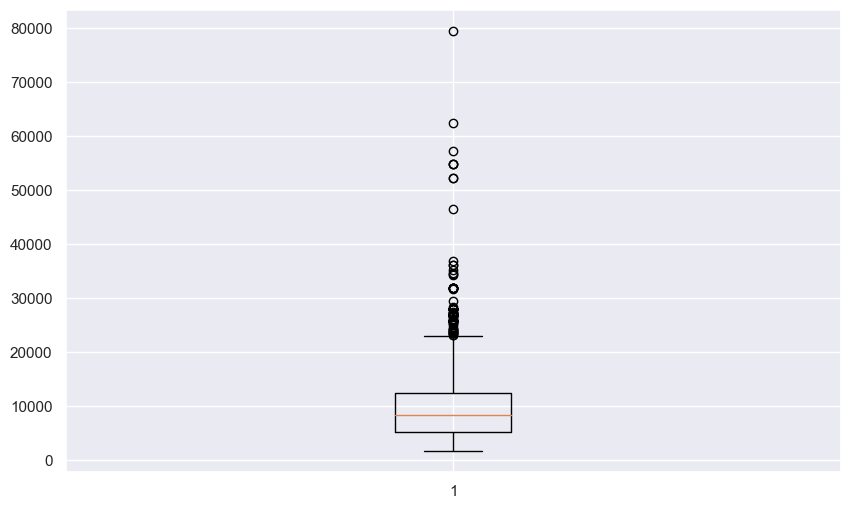

In [9]:
plt.figure(figsize = (10,6))
plt.boxplot(data["Price"])
plt.show()

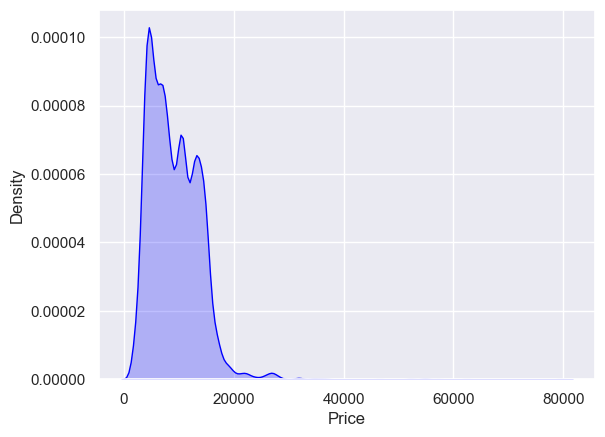

In [10]:
sns.kdeplot(data["Price"], shade=True, color="blue")
plt.show()


In [11]:

def detect_outliers_iqr(data, feature, threshold=1.5):
    q25, q75 = np.percentile(data[feature], 25), np.percentile(data[feature], 75)
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    # Remove outliers from the DataFrame
    data_no_outliers = data[~data.index.isin(outliers.index)]
    return data_no_outliers


In [12]:
data = detect_outliers_iqr(data,"Price")
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop           Null    3897  
1    05:50         13:15   7h 25m     2 stops            Null   7662  
2    09:25  04:25 10 Jun      19h     2 stops            Null  13882  
3    18:05         23:30   5h 25m      1 stop            Null   6218  
4    16:50         21:35   4h 45m      1 stop            Null  13302

In [13]:
data.shape

(10588, 11)

## <font color = 'blue'> Observations: </font>

- We have very less number of outliers which is negligible.

# <u><center><font color='blue'> EDA </font></center></u>

In [14]:
# Function to piint no.of unique values and value count for the given feature in it

def ValueCounts(data, feature):
    print(f"In {feature} there are {data[feature].nunique()} unique values.")
    return data[feature].value_counts()


In [15]:
# Function to create cat plot
def CatPlot(data, x_feature, y_feature):
    sns.catplot(x = x_feature, y = y_feature, data = data.sort_values(by = y_feature, ascending = False),
                kind = 'boxen', height = 6, aspect = 3)
    plt.show()
    

In [16]:
# Function to perform One Hot Encoding
def ohe(data,feature):
    ohe_data = data[[feature]]
    ohe_data[feature] = ohe_data[feature].astype('category')
    ohe_data_encoded = pd.get_dummies(data[[feature]], drop_first = False)
    ohe_data_encoded = ohe_data_encoded.astype(int)
    return ohe_data_encoded


In [17]:
# Function to extract day and month from date

def DayMonth(data,feature,extracted_day,extracted_month):
    # Extracting day
    data[extracted_day] = pd.to_datetime(data[feature], format = "%d/%m/%Y").dt.day
    # Extracting month
    data[extracted_month] = pd.to_datetime(data[feature], format = "%d/%m/%Y").dt.month
    

In [18]:
# Function to perform Label Encoder

def LabelEncoder(data, feature):
    return data[feature].replace({"non-stop" : 0, "1 stop" : 1, "2 stops" : 2,
                                  "3 stops" : 3, "4 stops" : 4}, inplace = True)


In [19]:
# Function to extract hour and minute from date
# Format hh:mm

def HourMinute(data,feature,extracted_hour,extracted_minute):
    # Extracting huor
    data[extracted_hour] = pd.to_datetime(data[feature]).dt.hour
    # Extracting minute
    data[extracted_minute] = pd.to_datetime(data[feature]).dt.minute
    

In [20]:
# Function to ectract hour and minute
# Format xh ym

def HoursMinutes(data,feature,extracted_hour, extracted_minute):
    data[extracted_hour] = 0
    data[extracted_minute] = 0
    for i in range (data.shape[0]):
        if len(data[feature][i].split()) != 2 :
            if 'h' in data[feature][i] :
                data[feature][i] = data[feature][i].strip() + ' 0m'
            else:
                data[feature][i] = '0h ' + data[feature][i].strip()
        data[extracted_hour][i] = int(data[feature][i].split('h')[0])
        data[extracted_minute][i] = int(data[feature][i].split('m')[0].split('h')[-1])
        

## <center> <font color='red'> Airline </font> </center>

In [21]:
ValueCounts(data,"Airline")

In Airline there are 11 unique values.


Airline
Jet Airways                          3787
IndiGo                               2053
Air India                            1736
Multiple carriers                    1186
SpiceJet                              817
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

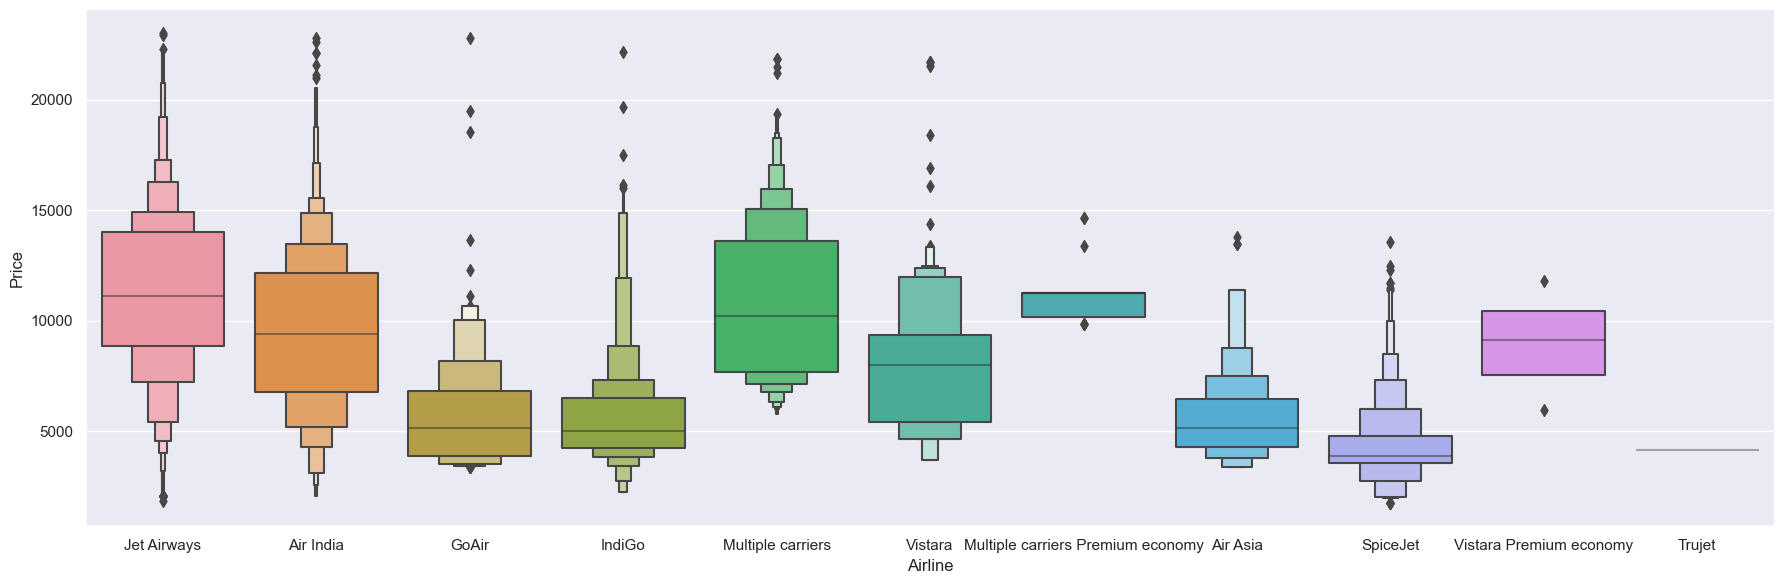

In [22]:
CatPlot(data,"Airline","Price")

In [23]:
Airline = ohe(data,"Airline")
Airline.head()

Airline_Air Asia  Airline_Air India  Airline_GoAir  Airline_IndiGo  \
0                 0                  0              0               1   
1                 0                  1              0               0   
2                 0                  0              0               0   
3                 0                  0              0               1   
4                 0                  0              0               1   

   Airline_Jet Airways  Airline_Multiple carriers  \
0                    0                          0   
1                    0                          0   
2                    1                          0   
3                    0                          0   
4                    0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

## <center><font color='red'> Date_of_Journey </font></center>

In [24]:
ValueCounts(data,"Date_of_Journey")

In Date_of_Journey there are 44 unique values.


Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     483
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    322
6/03/2019     303
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     213
9/03/2019     198
15/03/2019    160
18/03/2019    154
12/03/2019    140
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
01/03/2019     84
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      41
Name: count, dtype: int64

## <font color='blue'> Observation: </font>

- We can observe that the given data is only from the year 2019. So, we can extrat only day and month

In [25]:
DayMonth(data,"Date_of_Journey","Dept_day","Dept_month")
data.head()


Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop           Null    3897   
1    05:50         13:15   7h 25m     2 stops            Null   7662   
2    09:25  04:25 10 Jun      19h     2 stops            Null  13882   
3    18:05         23:30   5h 25m      1 stop            Null   6218   
4    16:50         21:35   4h 45m      1 stop            Null  13302   

   Dept_day  Dept_month  
0        24           3  
1         1           5  
2         9           6  
3        12           5  
4         1           3

In [26]:
ValueCounts(data,"Dept_month")

In Dept_month there are 4 unique values.


Dept_month
5    3464
6    3414
3    2631
4    1079
Name: count, dtype: int64

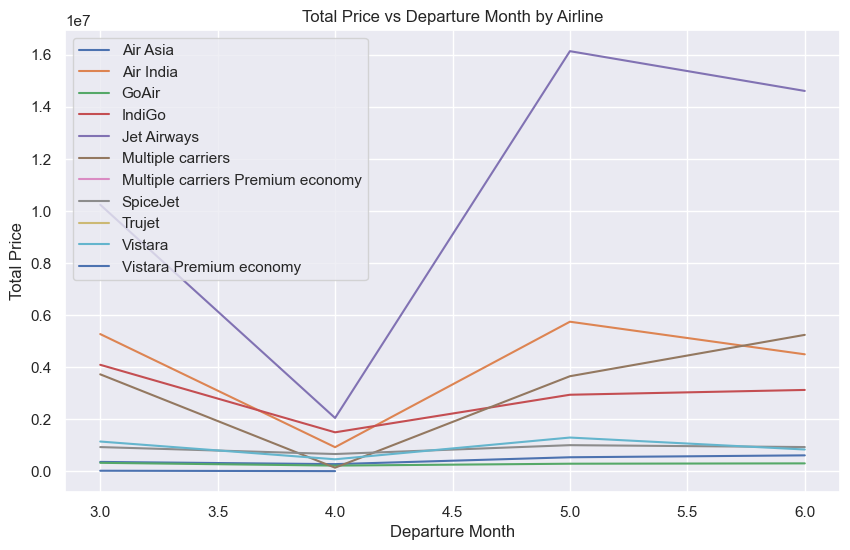

In [27]:

# Aggregate data
agg_data = data.groupby(['Dept_month', 'Airline'])['Price'].sum().reset_index()

plt.figure(figsize=(10, 6))
for airline in agg_data['Airline'].unique():
    subset = agg_data[agg_data['Airline'] == airline]
    plt.plot(subset['Dept_month'], subset['Price'], label=airline)

plt.xlabel('Departure Month')
plt.ylabel('Total Price')
plt.title('Total Price vs Departure Month by Airline')
plt.legend()
plt.show()


## <center> <font color='red'> Source </font> </center>

In [28]:
ValueCounts(data, "Source")

In Source there are 5 unique values.


Source
Delhi       4520
Kolkata     2870
Banglore    2125
Mumbai       692
Chennai      381
Name: count, dtype: int64

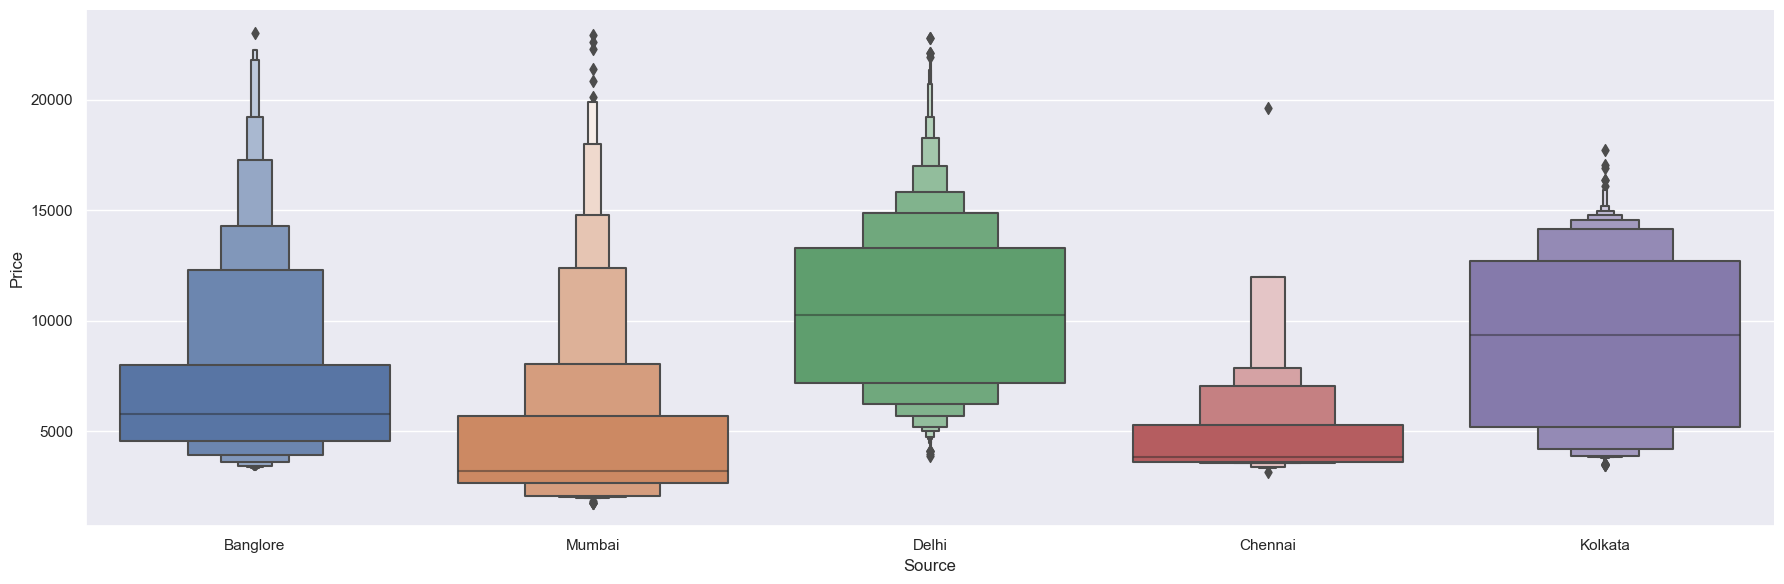

In [29]:
CatPlot(data, "Source", "Price")

In [30]:
Source = ohe(data, "Source")
Source.head()

Source_Banglore  Source_Chennai  Source_Delhi  Source_Kolkata  \
0                1               0             0               0   
1                0               0             0               1   
2                0               0             1               0   
3                0               0             0               1   
4                1               0             0               0   

   Source_Mumbai  
0              0  
1              0  
2              0  
3              0  
4              0

## <center> <font color='red'> Destination </font> </center>

In [31]:
ValueCounts(data, "Destination")

In Destination there are 6 unique values.


Destination
Cochin       4520
Banglore     2870
Delhi        1265
New Delhi     860
Hyderabad     692
Kolkata       381
Name: count, dtype: int64

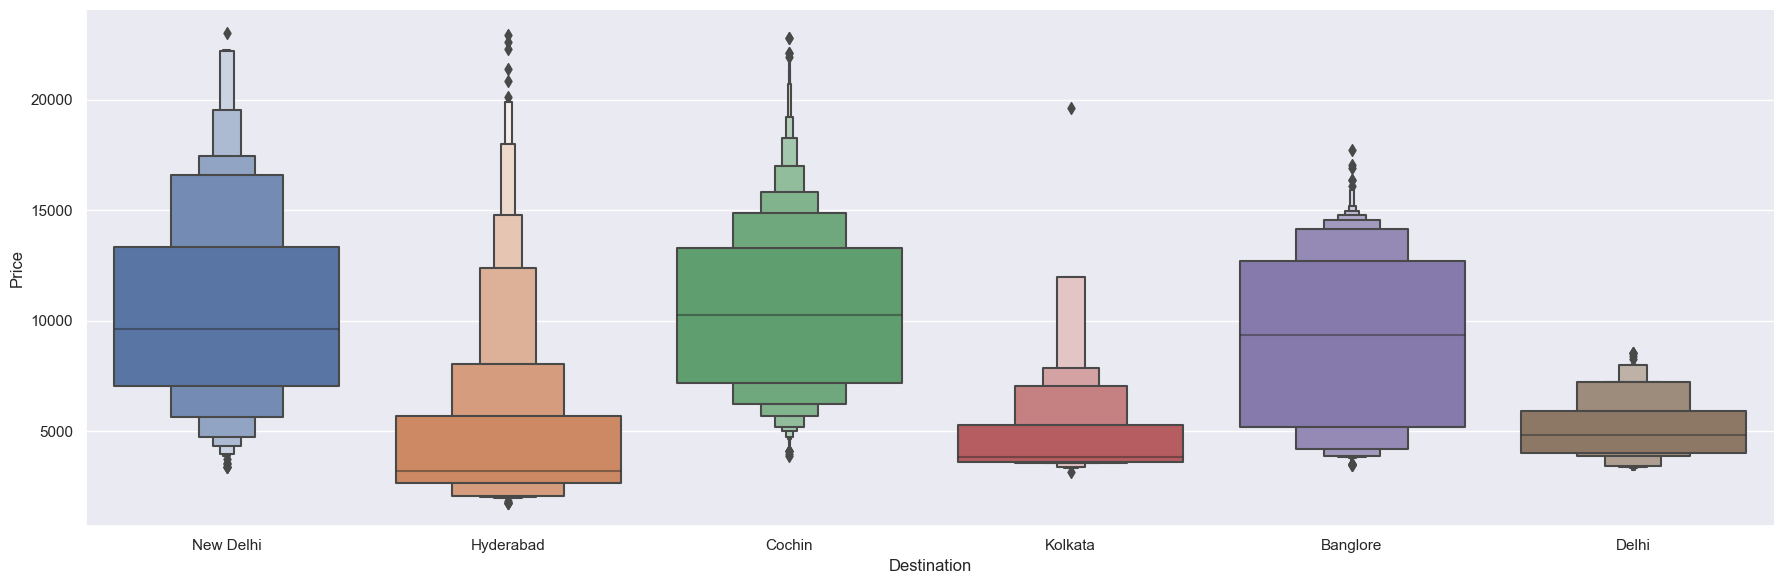

In [32]:
CatPlot(data, "Destination", "Price")

In [33]:
Destination = ohe(data, "Destination")
Destination.head()

Destination_Banglore  Destination_Cochin  Destination_Delhi  \
0                     0                   0                  0   
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
4                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1

## <center> <font color='red'> Route & Total_Stops </font> </center>

In [34]:
ValueCounts(data, "Route")

In Route there are 126 unique values.


Route
DEL → BOM → COK          2368
BLR → DEL                1550
CCU → BOM → BLR           979
CCU → BLR                 723
BOM → HYD                 621
                         ... 
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → NDC → HYD             1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 126, dtype: int64

In [35]:
ValueCounts(data, "Total_Stops")

In Total_Stops there are 5 unique values.


Total_Stops
1 stop      5550
non-stop    3488
2 stops     1504
3 stops       45
4 stops        1
Name: count, dtype: int64

In [36]:
# Comparing Route and Total_Stops

rt_data=data[["Total_Stops", "Route", "Route","Route"]]
rt_data.columns = ["Total_Stops", "Route", "Count", "No.of uniques"]
agg_data = rt_data.groupby("Total_Stops").agg({'Route' : lambda x : ",".join(x), "Count" : "count",
                                               "No.of uniques" : "nunique"})
agg_data


Route  Count  \
Total_Stops                                                             
1 stop       CCU → NAG → BLR,BLR → NAG → DEL,BLR → BOM → DE...   5550   
2 stops      CCU → IXR → BBI → BLR,DEL → LKO → BOM → COK,DE...   1504   
3 stops      DEL → RPR → NAG → BOM → COK,CCU → BBI → IXR → ...     45   
4 stops                      BLR → CCU → BBI → HYD → VGA → DEL      1   
non-stop     BLR → DEL,CCU → BLR,CCU → BLR,MAA → CCU,CCU → ...   3488   

             No.of uniques  
Total_Stops                 
1 stop                  47  
2 stops                 61  
3 stops                 12  
4 stops                  1  
non-stop                 5

In [37]:
45+61+11+1+5

123

## <font color='blue'> Observations: </font>

- From the above data frame (agg_data) we can conclude that feature **"Total_Stops"** is resembiling the feature **"Route"**.

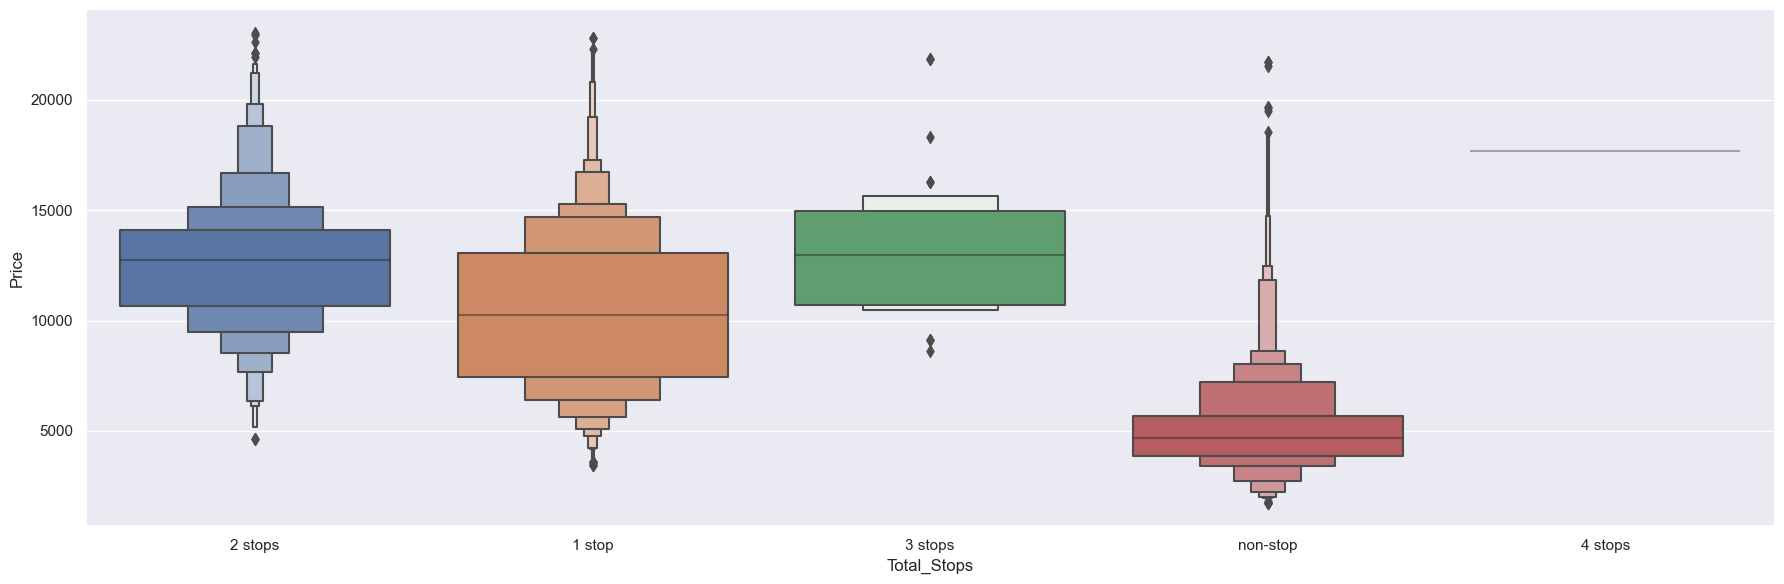

In [38]:
CatPlot(data, "Total_Stops", "Price")

In [39]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop           Null    3897   
1    05:50         13:15   7h 25m     2 stops            Null   7662   
2    09:25  04:25 10 Jun      19h     2 stops            Null  13882   
3    18:05         23:30   5h 25m      1 stop            Null   6218   
4    16:50         21:35   4h 45m      1 stop            Null  13302   

   Dept_day  Dept_month  
0        24           3  
1         1           5  
2         9           6  
3        12           5  
4         1           3

In [40]:
# Finding minimum fare for each flight of different stops
agg_data = data.groupby('Total_Stops')['Price'].agg(['min']).reset_index()
agg_data


Total_Stops    min
0      1 stop   3480
1     2 stops   4647
2     3 stops   8607
3     4 stops  17686
4    non-stop   1759

## <font color = 'blue'> Observations: </font>

- We can observe that as number of stops increases minimum fare also increases.
- So, we can perform Label Encoder in such a way that non-stop will get low order (weight) and 4 stops will get highr order (weight).

In [41]:
LabelEncoder(data,"Total_Stops")

In [42]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m            0           Null    3897   
1    05:50         13:15   7h 25m            2            Null   7662   
2    09:25  04:25 10 Jun      19h            2            Null  13882   
3    18:05         23:30   5h 25m            1            Null   6218   
4    16:50         21:35   4h 45m            1            Null  13302   

   Dept_day  Dept_month  
0        24           3  
1         1           5  
2         9           6  
3        12           5  
4         1           3

## <center><font color='red'> Dep_Time </font></center>

In [43]:
pd.set_option('display.max_rows', None)

In [44]:
ValueCounts(data, "Dep_Time")

In Dep_Time there are 222 unique values.


Dep_Time
18:55    233
17:00    225
07:05    205
10:00    203
07:10    202
20:00    185
09:00    184
09:35    183
21:10    179
13:00    164
07:00    159
14:05    158
10:20    158
11:30    158
11:40    155
08:00    150
06:30    139
05:30    138
09:45    136
08:25    136
06:00    131
20:25    125
17:45    118
08:20    114
05:45    113
16:30    109
16:55    103
22:50    103
16:00    100
12:00     98
19:45     97
07:30     95
19:35     94
15:15     91
17:30     90
17:15     89
09:40     89
09:25     85
19:30     83
02:15     80
20:20     79
05:55     78
20:55     78
05:50     77
13:15     76
08:45     75
21:25     73
04:55     73
15:00     72
07:35     72
11:10     71
06:40     71
14:00     71
06:50     70
22:20     70
08:30     69
09:30     68
23:05     66
06:55     66
18:15     66
21:50     66
10:35     63
17:10     63
16:45     62
21:05     61
07:55     59
19:00     58
14:35     58
09:10     57
14:25     56
05:15     56
23:30     55
06:05     53
13:20     53
19:10     53
20:30     51
19:

In [45]:
HourMinute(data, "Dep_Time", "Dept_hour", "Dept_minute")

In [46]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m            0           Null    3897   
1    05:50         13:15   7h 25m            2            Null   7662   
2    09:25  04:25 10 Jun      19h            2            Null  13882   
3    18:05         23:30   5h 25m            1            Null   6218   
4    16:50         21:35   4h 45m            1            Null  13302   

   Dept_day  Dept_month  Dept_hour  Dept_minute  
0        24           3         22           20  
1         1           5          5           50  
2         9           6          9           25  
3        12           5         18            5  
4         1           3         16           50

## <center><font color='red'> Arrival_Time </font></center>

In [47]:
ValueCounts(data,"Arrival_Time")

In Arrival_Time there are 1329 unique values.


Arrival_Time
19:00           423
21:00           360
19:15           332
16:10           151
12:35           122
20:45           112
18:50           111
22:30           111
22:50           104
11:20            95
19:50            94
12:20            86
21:20            85
22:25            77
21:05            72
23:35            71
20:05            69
14:05            68
08:35            67
12:00            63
19:45            59
07:15            56
12:55            55
23:00            55
18:10            54
13:15            53
19:40            53
11:25            53
10:40            53
08:45            53
22:00            52
15:30            52
22:35            51
10:10            51
19:35            50
22:55            50
10:05            49
07:45            49
12:10            49
21:50            49
16:20            49
09:30            49
13:55            49
11:50            49
08:50            48
10:35            48
18:15            48
04:25 07 Jun     48
23:15            46
22:20  

In [48]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [49]:
Duration_count = ValueCounts(data,"Duration")

In Duration there are 368 unique values.


In [50]:
# Finiding Duration which greater than 24 hours
threshold_minutes = 24 * 60 
total_count = 0

for time_str in Duration_count.index:
    hours = 0
    minutes = 0
    
    if 'h' in time_str:
        hours = int(time_str.split('h')[0])
    
    if 'm' in time_str:
        minutes = int(time_str.split("m")[0].split()[-1])
    
    # Convert to total minutes
    total_minutes = hours * 60 + minutes
    
    # Check if the total minutes are greater than the threshold
    if total_minutes > threshold_minutes:
        total_count += Duration_count[time_str]  
        print(f"{time_str}: {Duration_count[time_str]}")

print("Total count of times greater than 24h:", total_count)


26h 55m: 44
26h 35m: 39
27h 35m: 38
25h 45m: 34
27h 20m: 34
27h: 32
24h 45m: 30
26h 20m: 29
26h 10m: 29
29h 20m: 28
26h: 27
28h 50m: 25
24h 55m: 24
28h 20m: 22
24h 50m: 22
24h 35m: 22
25h 30m: 21
27h 5m: 21
25h 50m: 20
24h 30m: 20
26h 50m: 19
25h 55m: 18
24h 40m: 17
25h 20m: 17
27h 10m: 17
26h 30m: 15
27h 45m: 15
30h 30m: 15
24h 10m: 15
27h 40m: 14
30h 20m: 14
25h 5m: 14
25h 35m: 14
25h 40m: 13
26h 40m: 13
38h: 13
28h 5m: 12
25h: 12
38h 15m: 12
28h: 11
29h 35m: 11
33h 15m: 11
26h 15m: 9
29h 5m: 9
25h 25m: 9
25h 15m: 9
29h 55m: 8
26h 25m: 8
37h 25m: 8
37h 20m: 8
28h 15m: 7
24h 15m: 7
30h 40m: 7
36h 10m: 6
30h 55m: 5
28h 25m: 5
29h 50m: 5
32h 5m: 5
38h 20m: 5
28h 40m: 5
24h 5m: 4
26h 45m: 4
28h 10m: 4
24h 25m: 4
38h 35m: 3
26h 5m: 3
27h 50m: 3
24h 20m: 3
30h: 3
25h 10m: 3
35h 5m: 3
31h 40m: 2
34h 30m: 2
31h 55m: 2
39h 5m: 2
32h 30m: 2
30h 45m: 2
34h: 2
34h 5m: 2
34h 25m: 2
35h 15m: 2
27h 25m: 2
28h 55m: 2
31h 50m: 1
32h 20m: 1
37h 10m: 1
40h 20m: 1
29h 30m: 1
42h 45m: 1
27h 30m: 1
33h 20

In [51]:
data.shape

(10588, 15)

In [52]:
(868/10682)*100

8.125819134993446

## <font color='blue'> Observations: </font>

- **Arrival_Time** contains some data stamped with time and other with time & date.
- As our toal contains fully domestic flights, usually journey time will be within 24 hours. 
- But, we got almost 10% of the flights took more than 24 hours for its journey.
- Still, we can extract only time from **Arrival_Time**, because as we including **Duration** feature also.

In [53]:
HourMinute(data,"Arrival_Time","Arrival_hour", "Arrival_min")

In [54]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m            0           Null    3897   
1    05:50         13:15   7h 25m            2            Null   7662   
2    09:25  04:25 10 Jun      19h            2            Null  13882   
3    18:05         23:30   5h 25m            1            Null   6218   
4    16:50         21:35   4h 45m            1            Null  13302   

   Dept_day  Dept_month  Dept_hour  Dept_minute  Arrival_hour  Arrival_min  
0        24           3         22           20             1           10  
1         1           5          5           50            13           15  
2         9           6          9           25             4           25  
3        12           5         18            5            23           30  
4         1           3         16           50            21           35

## <center><font color='red'> Duration </font></center>

In [55]:
ValueCounts(data,"Duration")

In Duration there are 368 unique values.


Duration
2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     335
2h 35m     328
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
2h 15m     135
1h 25m     135
2h 25m      98
13h 30m     97
13h 20m     88
3h 15m      88
7h 30m      86
9h 30m      83
8h 40m      81
3h 5m       78
7h 15m      77
7h 35m      71
5h 30m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
11h         62
11h 45m     62
5h          62
5h 15m      62
1h 20m      61
14h 25m     61
6h 35m      59
12h 10m     57
22h 55m     57
12h 45m     56
10h 30m     55
5h 45m      54
11h 30m     52
12h 30m     52
16h 5m      52
7h 20m      52
4h 55m      51
10h 15m     50
15h 10m     50
8h 25m      50
12h         49
10h         49
12h 15m     48
10h 25m     47
5h 20m      45
11h 5m      45
26h 55m     44
6h 15m      43
14h 5m      42
8h 55m      42
9h 15m      42
9h 20m      41
13h         41
9h 35m      41
3h 10m      40
17h 5m      40
20h 10m     40
21h 15m     39
26h 35m     39
27h 35m     38
2

In [56]:
data.reset_index(drop=True, inplace=True)

In [57]:
HoursMinutes(data, "Duration", "Duration_hour", "Duration_minute" )

In [58]:
ValueCounts(data,"Duration")

In Duration there are 368 unique values.


Duration
2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     335
2h 35m     328
3h 0m      261
2h 20m     238
2h 30m     220
2h 40m     158
2h 15m     135
1h 25m     135
2h 25m      98
13h 30m     97
13h 20m     88
3h 15m      88
7h 30m      86
9h 30m      83
8h 40m      81
3h 5m       78
7h 15m      77
7h 35m      71
5h 30m      71
8h 0m       68
7h 5m       65
9h 50m      64
9h 0m       64
11h 0m      62
11h 45m     62
5h 0m       62
5h 15m      62
1h 20m      61
14h 25m     61
6h 35m      59
12h 10m     57
22h 55m     57
12h 45m     56
10h 30m     55
5h 45m      54
11h 30m     52
12h 30m     52
16h 5m      52
7h 20m      52
4h 55m      51
10h 15m     50
15h 10m     50
8h 25m      50
12h 0m      49
10h 0m      49
12h 15m     48
10h 25m     47
5h 20m      45
11h 5m      45
26h 55m     44
6h 15m      43
14h 5m      42
8h 55m      42
9h 15m      42
9h 20m      41
13h 0m      41
9h 35m      41
3h 10m      40
17h 5m      40
20h 10m     40
21h 15m     39
26h 35m     39
27h 35m     38
2

In [59]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m            0           Null    3897   
1    05:50         13:15   7h 25m            2            Null   7662   
2    09:25  04:25 10 Jun   19h 0m            2            Null  13882   
3    18:05         23:30   5h 25m            1            Null   6218   
4    16:50         21:35   4h 45m            1            Null  13302   

   Dept_day  Dept_month  Dept_hour  Dept_minute  Arrival_hour  Arrival_min  \
0        24           3         22           20             1           10   
1         1           5          5           50            13           15   
2         9           6          9           25             4           25   
3        12           5         18            5            23           30   
4         1           3         16           50            21           35   

   Duration_hour  Duration_minute  
0              2               50  
1              7               25  
2             19                0  
3              5               25  
4              4               45

## <center><font color='red'> Additional_Info </font></center>

In [60]:
ValueCounts(data,"Additional_Info")

In Additional_Info there are 7 unique values.


Additional_Info
Null                            8269
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                     9
Change airports                    6
Null                               1
Red-eye flight                     1
Name: count, dtype: int64

In [61]:
(8269/(data.shape[0]))*100

78.09784661881375

## <font color='blue'> Observations: </font>

- **Null** means **There is no additional information** about that flight which more in proportion which is about **78.09%**. So, we can drop this feature.

In [62]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m            0           Null    3897   
1    05:50         13:15   7h 25m            2            Null   7662   
2    09:25  04:25 10 Jun   19h 0m            2            Null  13882   
3    18:05         23:30   5h 25m            1            Null   6218   
4    16:50         21:35   4h 45m            1            Null  13302   

   Dept_day  Dept_month  Dept_hour  Dept_minute  Arrival_hour  Arrival_min  \
0        24           3         22           20             1           10   
1         1           5          5           50            13           15   
2         9           6          9           25             4           25   
3        12           5         18            5            23           30   
4         1           3         16           50            21           35   

   Duration_hour  Duration_minute  
0              2               50  
1              7               25  
2             19                0  
3              5               25  
4              4               45

In [63]:
Airline = Airline.reset_index(drop=True)
Source = Source.reset_index(drop=True)
Destination = Destination.reset_index(drop=True)


In [64]:
final_data = pd.concat([data, Airline, Source, Destination], axis = 1)
final_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  ...  \
0    22:20  01:10 22 Mar   2h 50m            0           Null   ...   
1    05:50         13:15   7h 25m            2            Null  ...   
2    09:25  04:25 10 Jun   19h 0m            2            Null  ...   
3    18:05         23:30   5h 25m            1            Null  ...   
4    16:50         21:35   4h 45m            1            Null  ...   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Banglore  Destination_Cochin  Destination_Delhi  \
0                     0                   0                  0   
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
4                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 41 columns]

# <center><font color = 'blue'> FEATURE SELECTOIN </font></center>

In [65]:
final_data.drop(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
                       'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'], axis = 1, inplace = True)

In [66]:
final_data.head()

Total_Stops  Price  Dept_day  Dept_month  Dept_hour  Dept_minute  \
0            0   3897        24           3         22           20   
1            2   7662         1           5          5           50   
2            2  13882         9           6          9           25   
3            1   6218        12           5         18            5   
4            1  13302         1           3         16           50   

   Arrival_hour  Arrival_min  Duration_hour  Duration_minute  ...  \
0             1           10              2               50  ...   
1            13           15              7               25  ...   
2             4           25             19                0  ...   
3            23           30              5               25  ...   
4            21           35              4               45  ...   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Banglore  Destination_Cochin  Destination_Delhi  \
0                     0                   0                  0   
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
4                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 32 columns]

In [67]:
final_data.shape

(10588, 32)

In [68]:
final_data.columns

Index(['Total_Stops', 'Price', 'Dept_day', 'Dept_month', 'Dept_hour',
       'Dept_minute', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_minute', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [69]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10588 entries, 0 to 10587
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10588 non-null  int64
 1   Price                                      10588 non-null  int64
 2   Dept_day                                   10588 non-null  int32
 3   Dept_month                                 10588 non-null  int32
 4   Dept_hour                                  10588 non-null  int32
 5   Dept_minute                                10588 non-null  int32
 6   Arrival_hour                               10588 non-null  int32
 7   Arrival_min                                10588 non-null  int32
 8   Duration_hour                              10588 non-null  int64
 9   Duration_minute                            10588 non-null  int64
 10  Airline_Air Asia                           105

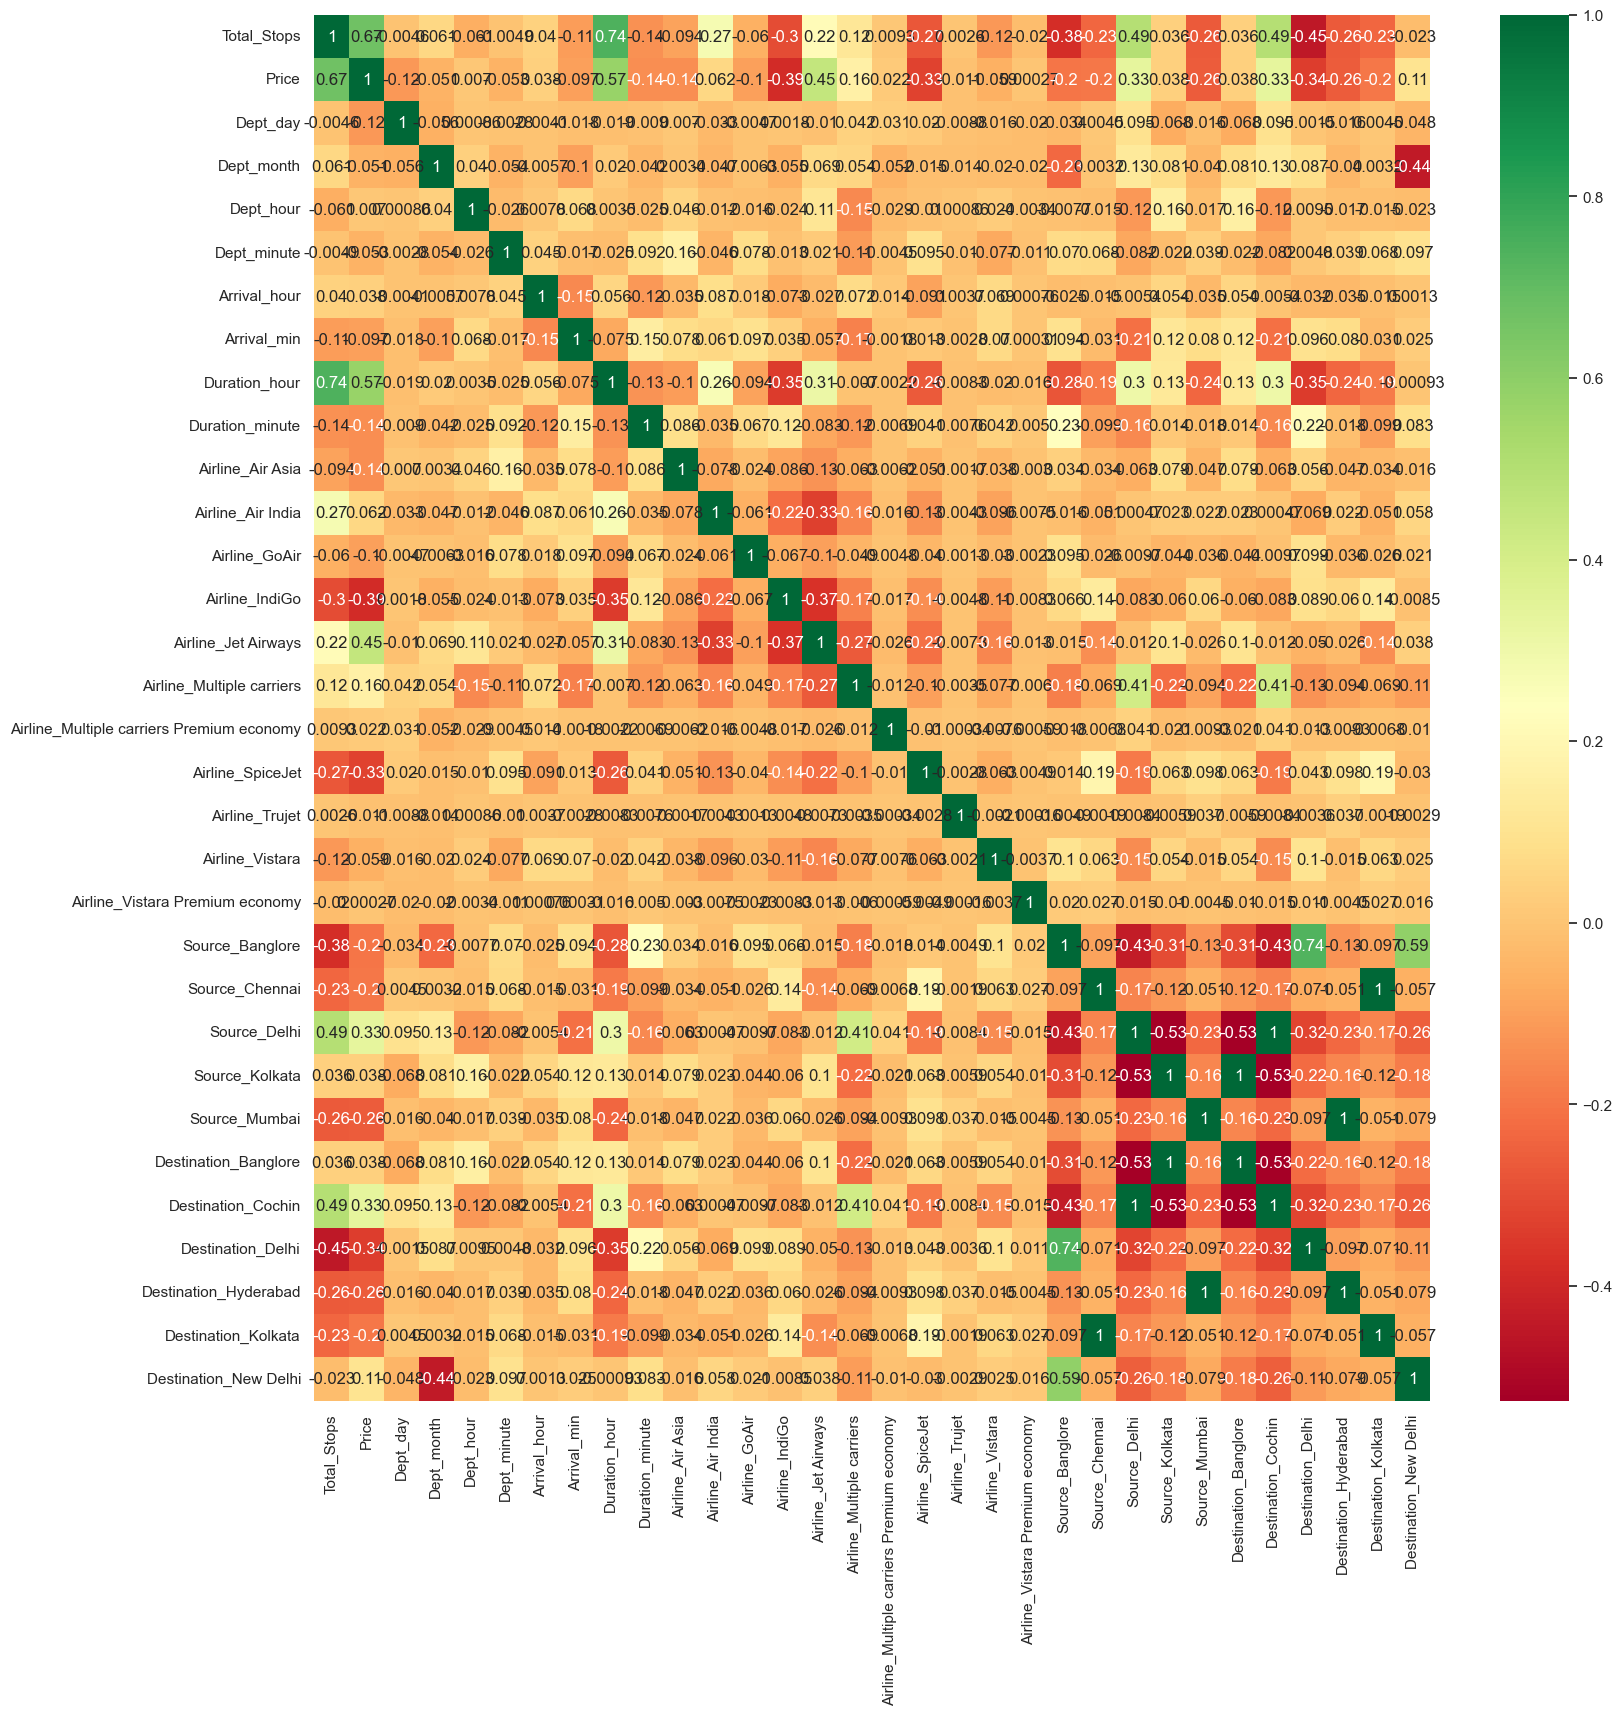

In [70]:
plt.figure(figsize = (18,18))
sns.heatmap(final_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [71]:
# Splitting x and y

x = final_data.drop(columns = ["Price"])
y = final_data["Price"]

In [72]:
x.head()

Total_Stops  Dept_day  Dept_month  Dept_hour  Dept_minute  Arrival_hour  \
0            0        24           3         22           20             1   
1            2         1           5          5           50            13   
2            2         9           6          9           25             4   
3            1        12           5         18            5            23   
4            1         1           3         16           50            21   

   Arrival_min  Duration_hour  Duration_minute  Airline_Air Asia  ...  \
0           10              2               50                 0  ...   
1           15              7               25                 0  ...   
2           25             19                0                 0  ...   
3           30              5               25                 0  ...   
4           35              4               45                 0  ...   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Banglore  Destination_Cochin  Destination_Delhi  \
0                     0                   0                  0   
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
4                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 31 columns]

In [73]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [74]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)
print(f"Shape of x_train is {x_train.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of x_test is {x_test.shape}")
print(f"Shape of y_test is {y_test.shape}")


Shape of x_train is (8470, 31)
Shape of y_train is (8470,)
Shape of x_test is (2118, 31)
Shape of y_test is (2118,)


In [75]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)


ExtraTreesRegressor()

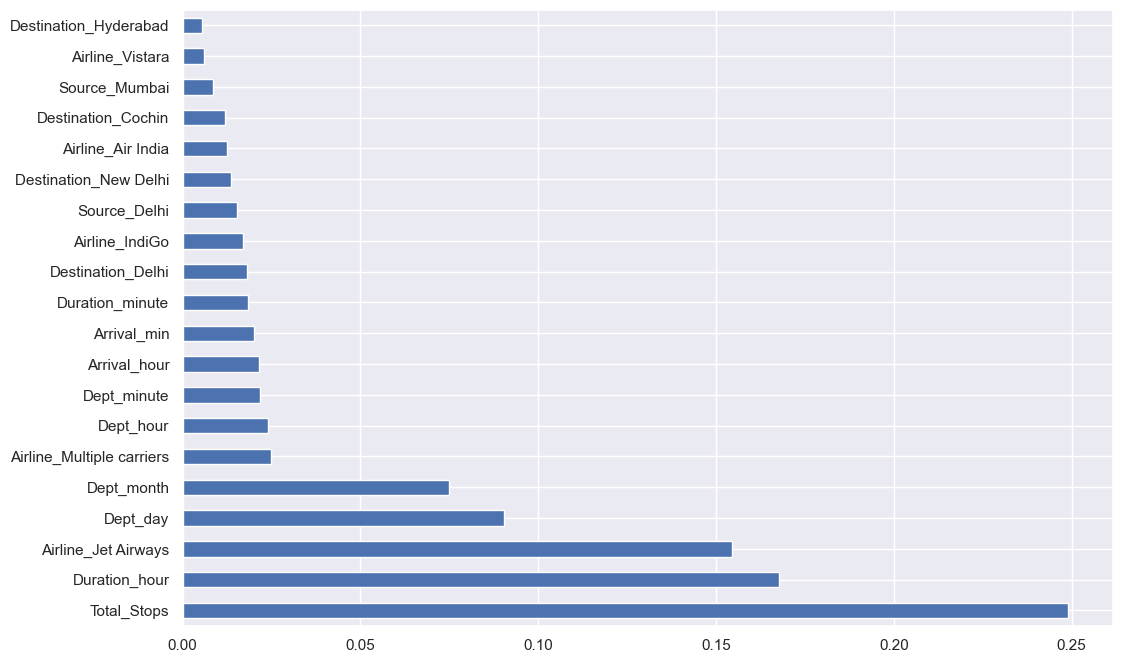

In [76]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [77]:
y_test.shape

(2118,)

# <center><font color = 'blue'> MODEL TRAINING </font></center>

In [78]:
# Function to run a base regression model and prints output

model_name_l = []
mse_l = []
mae_l = []
rmse_l = []
r2_l = []

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def Regressor(mlmodel, x_train, y_train, x_test, y_test):
    
    model = mlmodel
    print(model)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")
    
    model_name_l.append(model.__class__.__name__)
    mse_l.append(round(mse, 3))
    mae_l.append(round(mae, 3))
    rmse_l.append(round(rmse, 3))
    r2_l.append(round(r2, 3))
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot the residuals on the first subplot (axes[0])
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, ax=axes[0])  # Pass axes[0] to sns.histplot
    axes[0].set_title('Distribution of Residuals')
    axes[0].set_xlabel('Residuals')
    axes[0].set_ylabel('Frequency')

    # Scatter plot (Actual vs Predicted) on the second subplot (axes[1])
    axes[1].scatter(y_test, y_pred, alpha=0.5, color='blue')  # Corrected to use axes[1].scatter
    axes[1].set_title('Scatter plot (Actual vs Predicted)')
    axes[1].set_xlabel("Actual Values (y_test)")
    axes[1].set_ylabel("Predicted Values (y_pred)")

    # Show the plot
    plt.show()

In [79]:
# Function to run a tuned regression model and prints output

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def GridSearch(ml_model, parameters_grid, x_train, y_train, x_test, y_test):
    model = GridSearchCV(estimator=ml_model, param_grid=parameters_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    print(model)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    best_params = model.best_params_
    print("Best parameters found: ", best_params)
    

In [80]:
# Function to print the results from models as a data frame
def result():
    result = {'Model' : model_name_l, 'MSE' : mse_l, 'MAE' : mae_l,
             'RMSE' : rmse_l, 'R2 SCORE' : r2_l}
    result_df = pd.DataFrame(result)
    return result_df


## <font color = 'red'> Linear Regression </font>

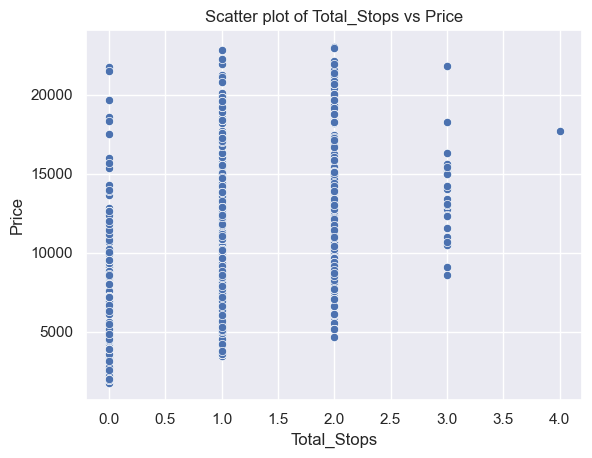

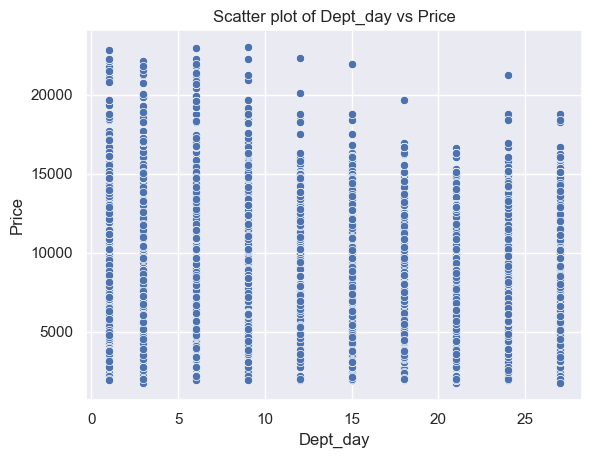

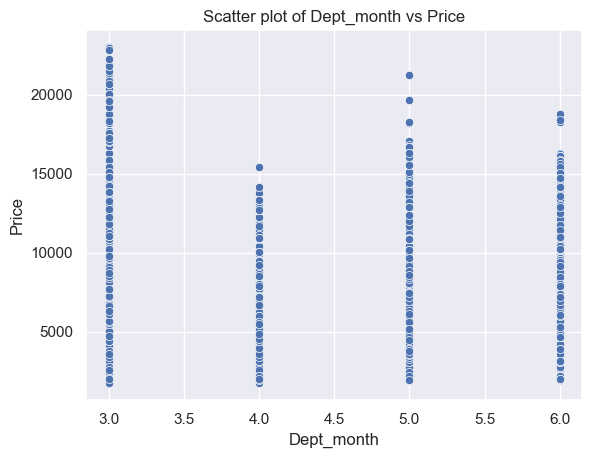

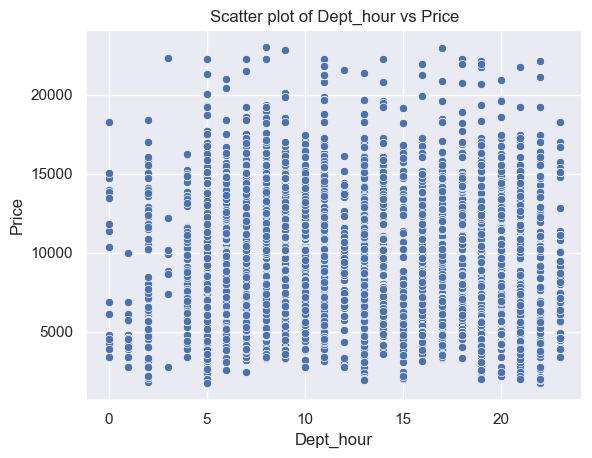

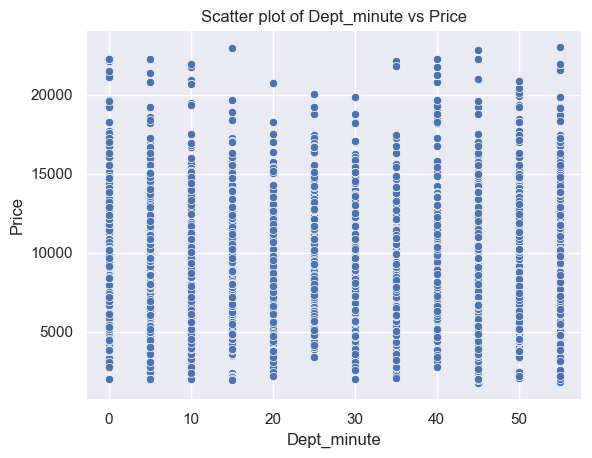

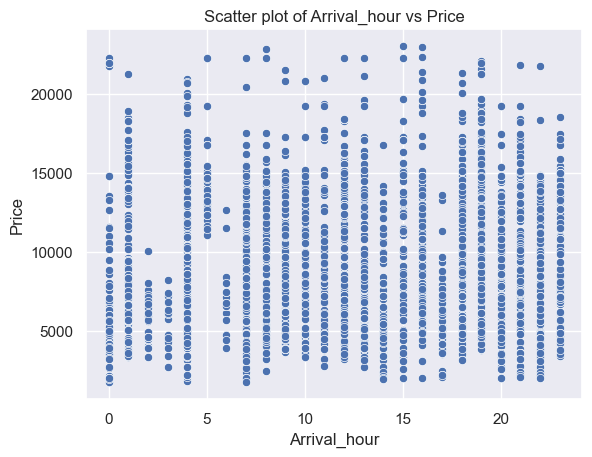

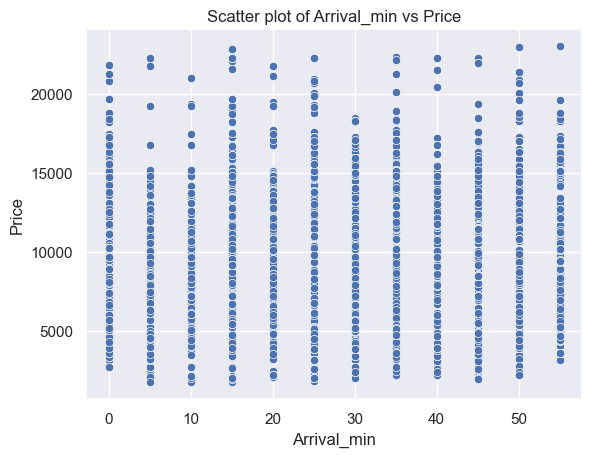

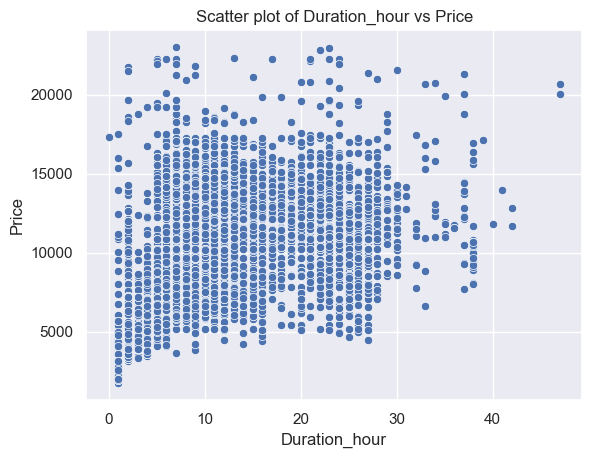

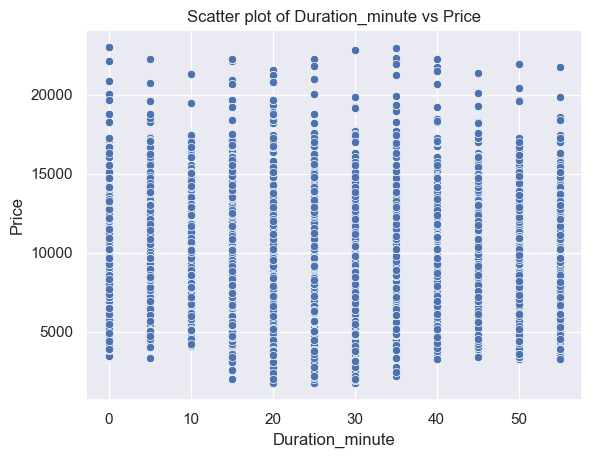

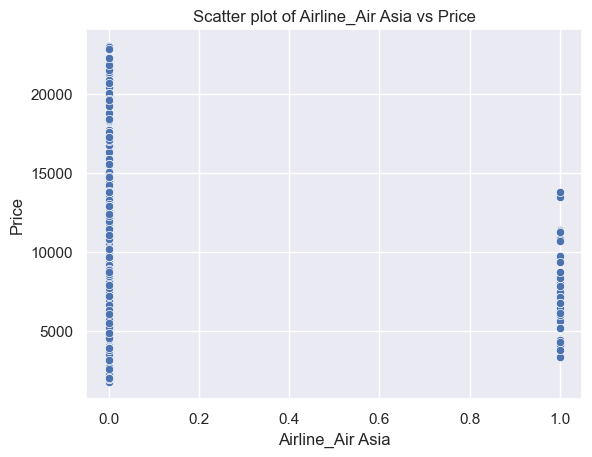

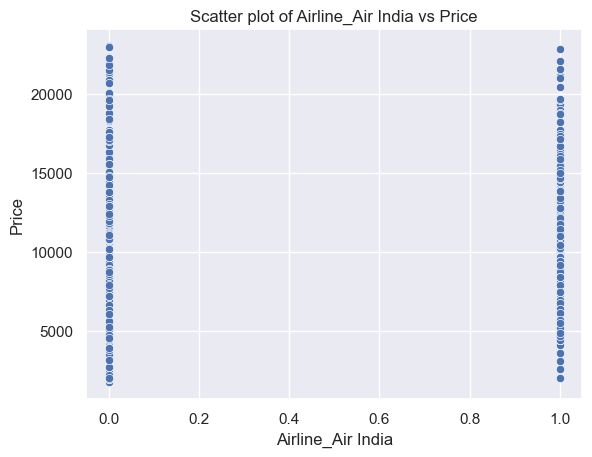

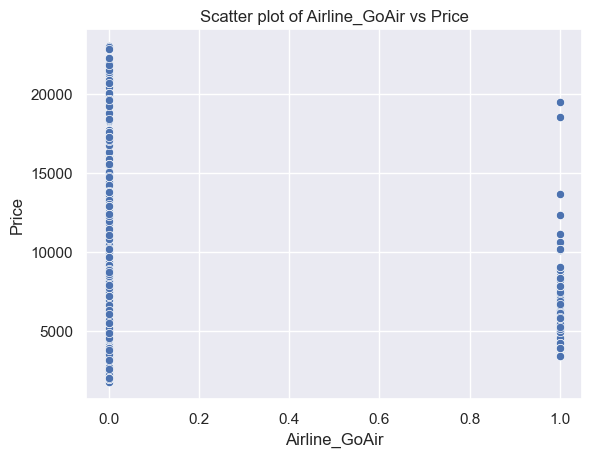

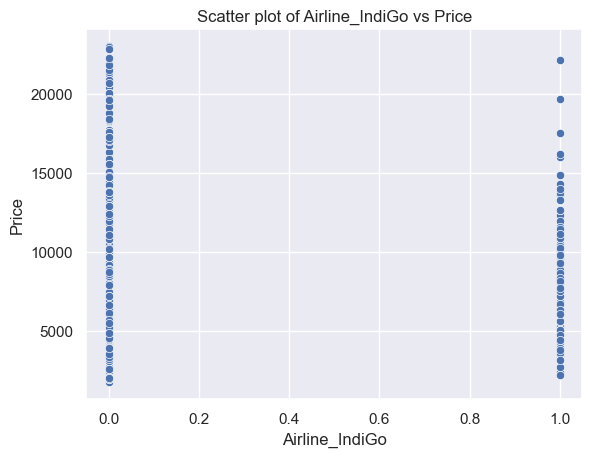

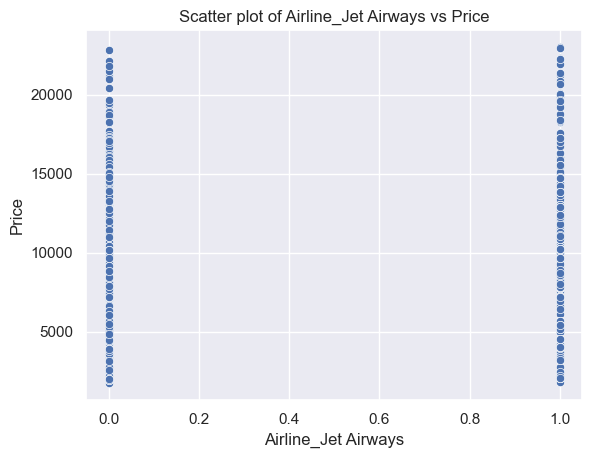

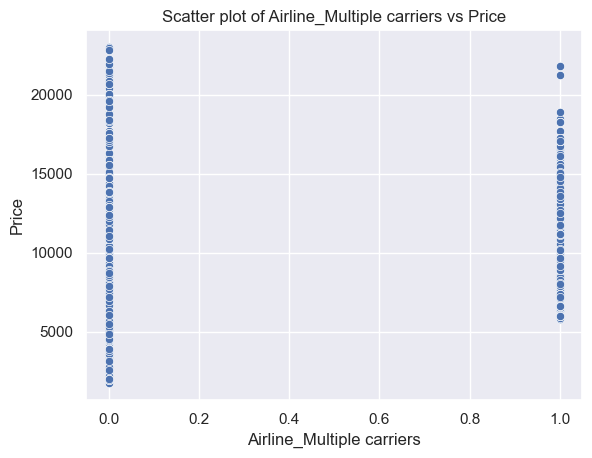

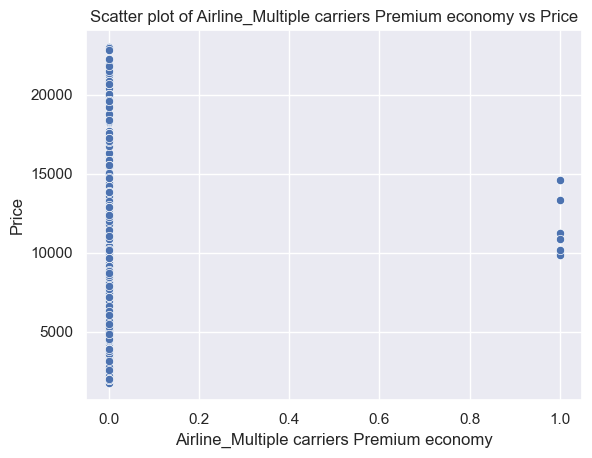

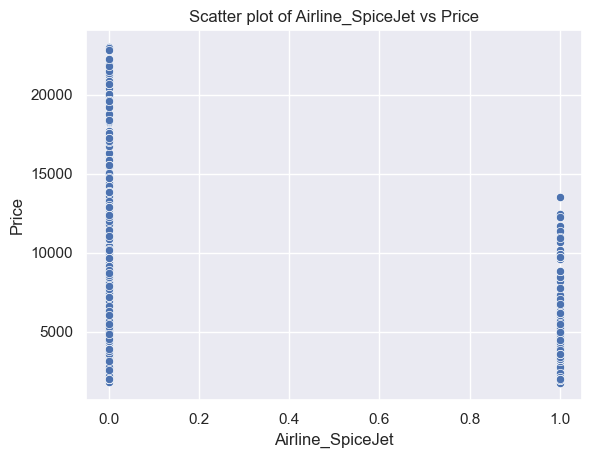

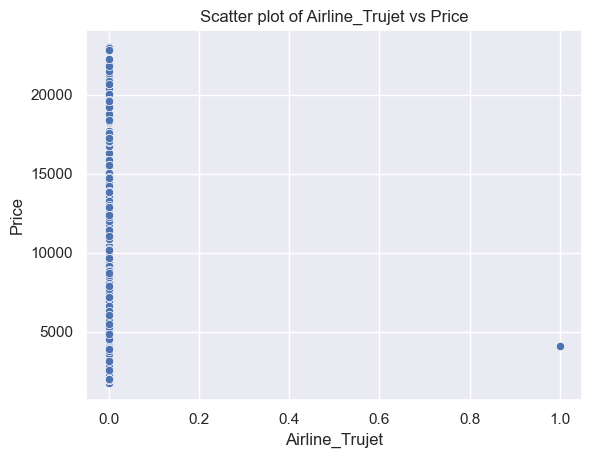

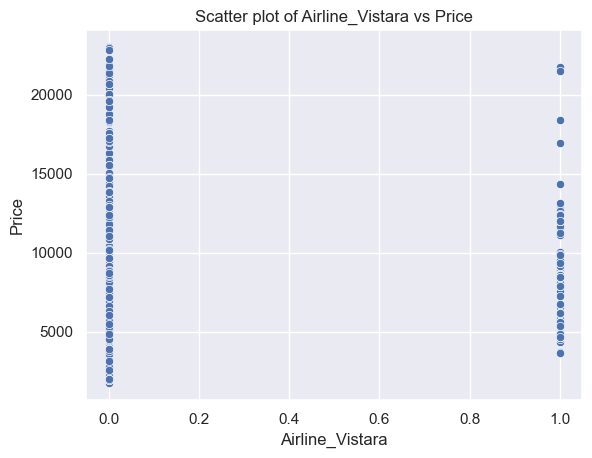

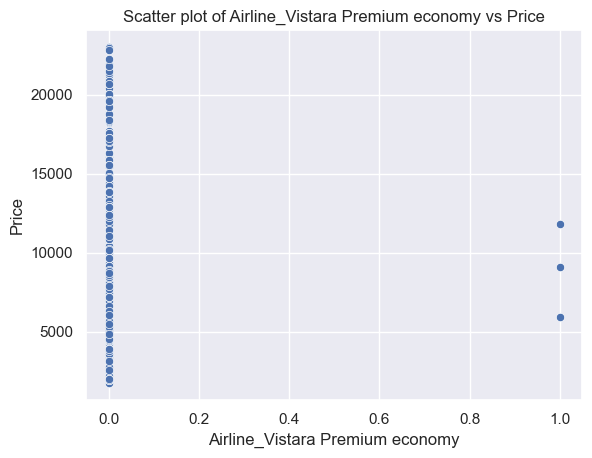

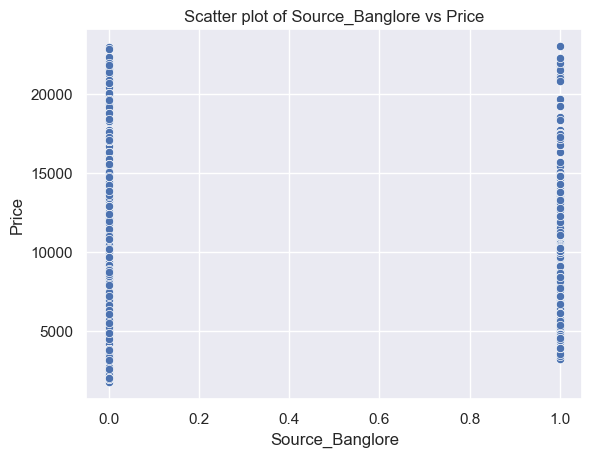

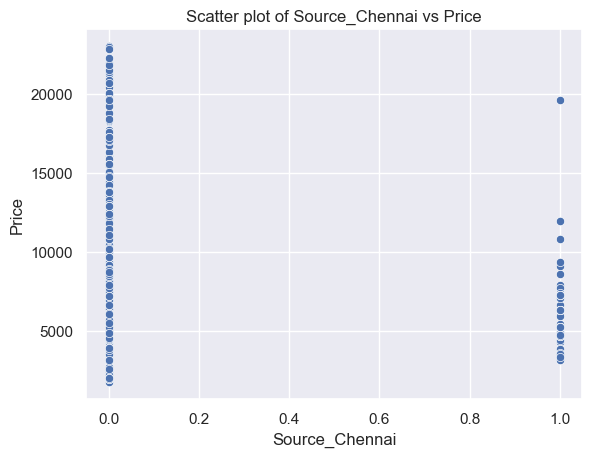

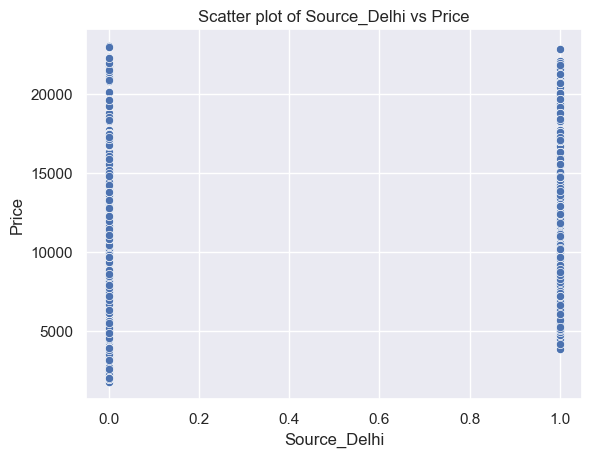

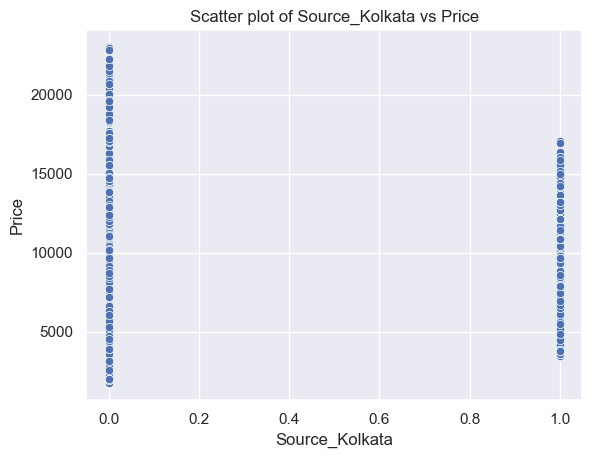

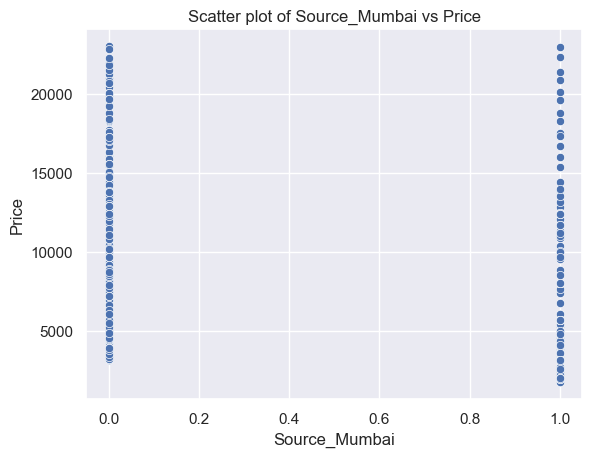

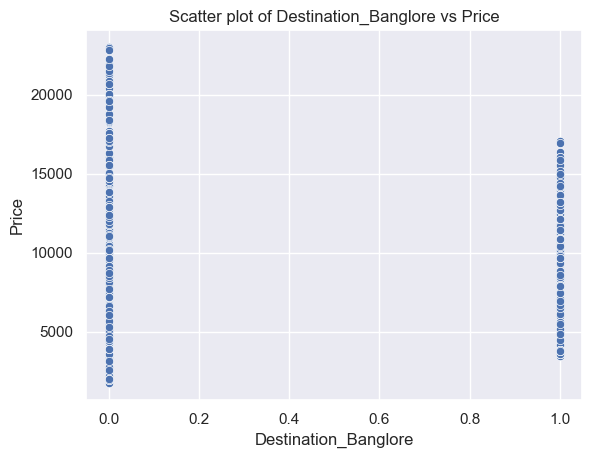

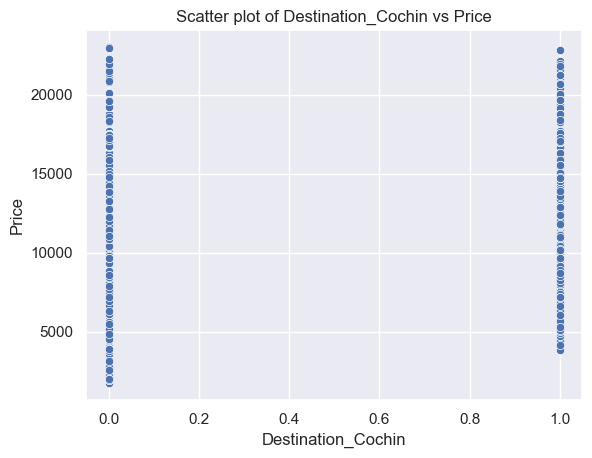

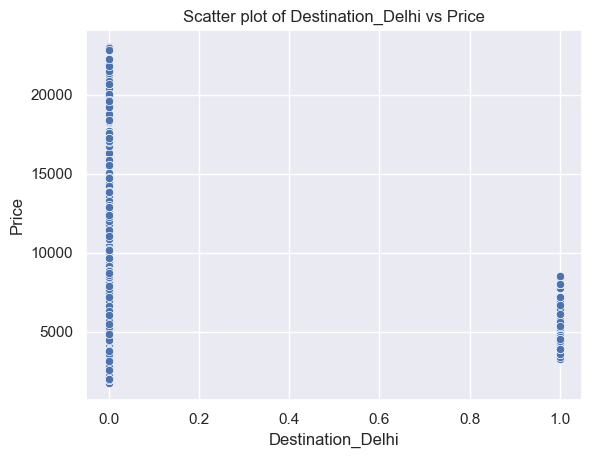

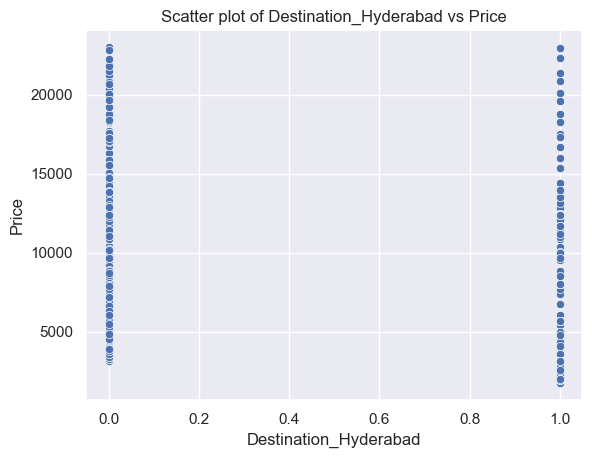

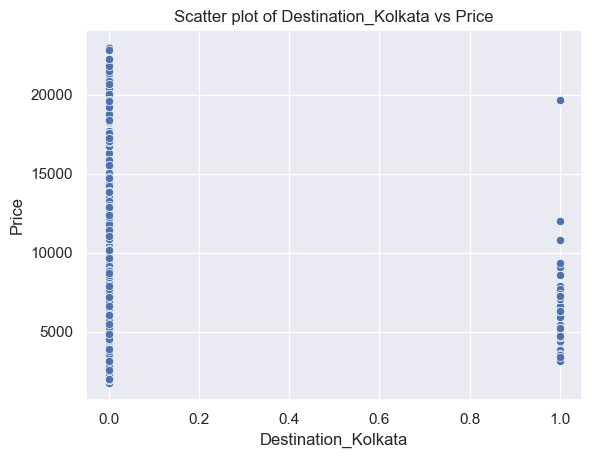

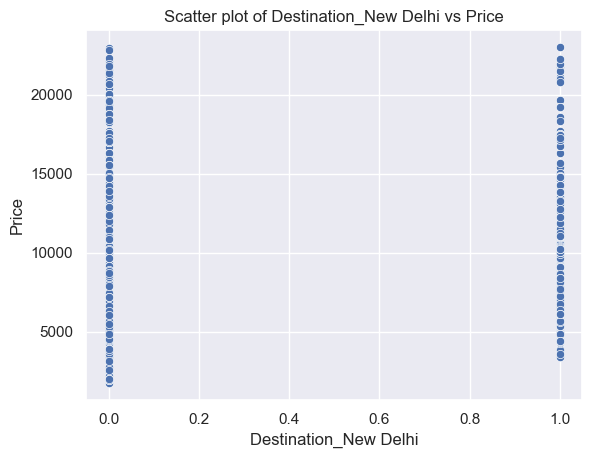

In [81]:
# Checking linearity of the data to perform Linear regression
for column in x_train.columns:  # No need to replace; this should work directly
    sns.scatterplot(x=x_train[column], y=y_train)  # 'y_train' is already the target variable
    plt.title(f'Scatter plot of {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()


## <font color = 'red'> Random Forest Regressor </font>

RandomForestRegressor()
Mean Absolute Error (MAE): 1121.8721390637743
Mean Squared Error (MSE): 3016139.543804517
Root Mean Squared Error (RMSE): 1736.7036430561539
R-squared (R2): 0.8218297331739348


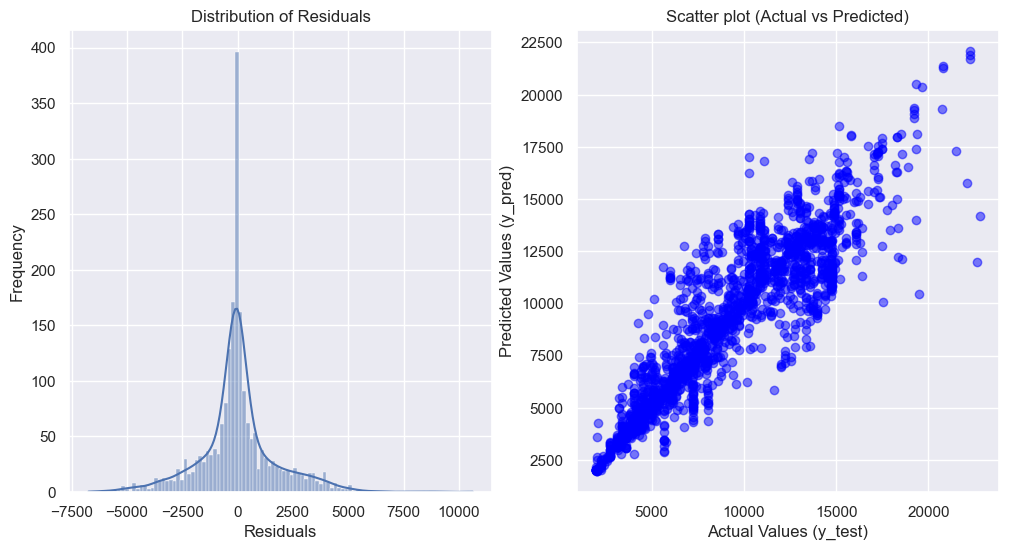

In [82]:
# Base model

from sklearn.ensemble import RandomForestRegressor
Regressor(RandomForestRegressor(), x_train, y_train, x_test, y_test)


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
  - The residuals (errors) are centered around zero and have a peak near zero, suggesting that most predictions are close to the actual values.
  - The distribution appears to be roughly normal, but with some skewness on both the positive and negative ends. This could indicate that while the model is generally accurate, there are instances where it significantly underestimates or overestimates.

- **Scatter Plot (Actual vs Predicted):**
  - The scatter plot shows the relationship between actual and predicted values.
  - The points are generally aligned along the diagonal, which indicates that the model's predictions are close to the actual values.
  - There is some spread around the diagonal line, especially at higher values, suggesting that the model's predictions are less accurate for larger values.

### Conclusion
- The **RandomForestRegressor** model is performing reasonably well, with a strong R-squared value and residuals centered around zero.


In [83]:
# Hyperparameter tuning

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

GridSearch(RandomForestRegressor(), param_grid, x_train, y_train, x_test, y_test)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestRegressor(max_features='sqrt', min_samples_split=10,
                      n_estimators=200)
Mean Absolute Error (MAE): 1229.2576429800665
Mean Squared Error (MSE): 2963119.110367701
Root Mean Squared Error (RMSE): 1721.3712877725425
R-squared (R2): 0.8249617715413491


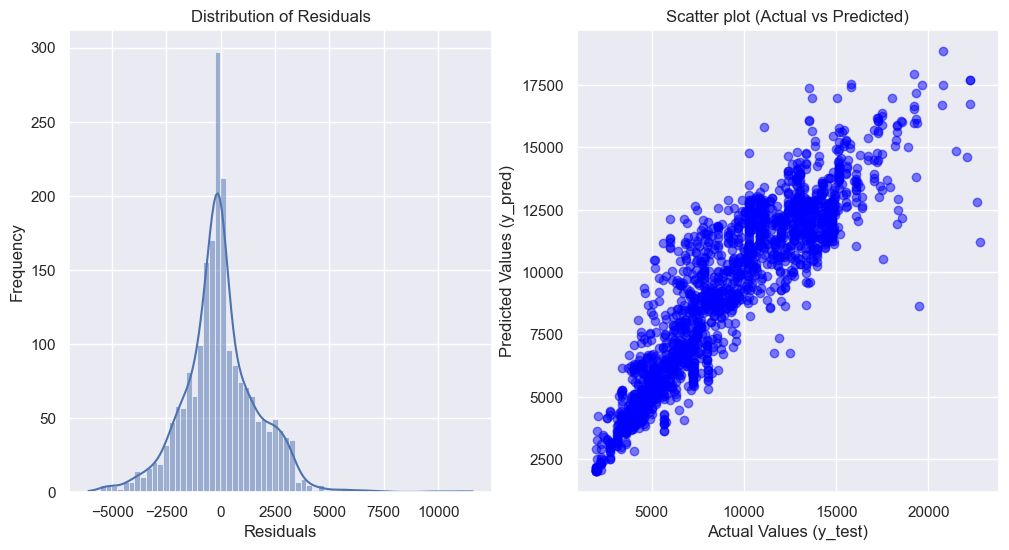

In [84]:
# Tuned model
rf = RandomForestRegressor(max_depth = None, max_features = 'sqrt', min_samples_leaf = 1,
                           min_samples_split = 10, n_estimators = 200)

Regressor(rf, x_train, y_train, x_test, y_test)


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
- The residuals continue to be centered around zero, indicating that the model's predictions are balanced between overestimates and underestimates.
- The distribution appears more normal compared to the previous model, with a sharp peak around zero, suggesting that the model is more consistent in making predictions close to the actual values.
- **Scatter Plot (Actual vs Predicted):**
- The scatter plot remains similar, with the points clustering along the diagonal, indicating that the predictions are close to the actual values.  - The points are generally aligned along the diagonal, which indicates that the model's predictions are close to the actual values.
- There is still some spread, particularly at higher values, though the spread appears to be slightly less than in the previous model. This suggests that while there has been some improvement, the model still struggles a bit with higher-value predictions.
### Conclusion
- The hyperparameter tuning has led to a minor improvement in the model's overall performance. The model is still generally performing well but shows room for further enhancement, particularly in reducing prediction errors at higher values.

## <font color = 'red'> Support Vector Regressor </font>

SVR(C=100, gamma=0.1)
Mean Absolute Error (MAE): 3306.5109169790953
Mean Squared Error (MSE): 15707029.93729366
Root Mean Squared Error (RMSE): 3963.209550010403
R-squared (R2): 0.07214978805569983


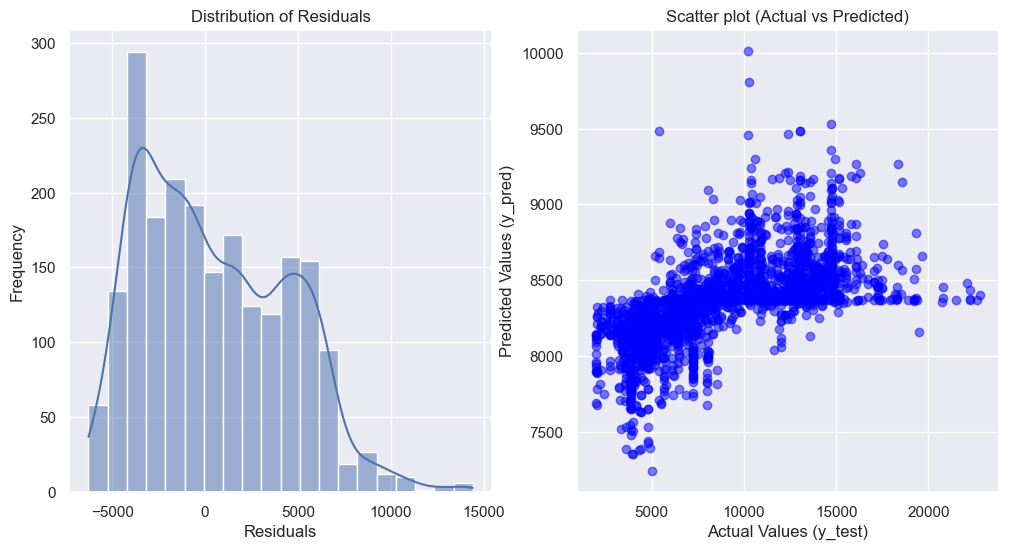

In [85]:
# Base model

from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
Regressor(svr, x_train, y_train, x_test, y_test)


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
- The residuals are not centered around zero as they were with the RandomForestRegressor, suggesting a bias in the predictions.
- The distribution is skewed, with a significant number of predictions having large errors, especially on the positive side. This means the model frequently underpredicts.
- There is a notable spread in the residuals, indicating inconsistency in the model's predictions.
- **Scatter Plot (Actual vs Predicted):**
- The points deviate significantly from the diagonal line, indicating poor alignment between actual and predicted values.
- The model struggles with both low and high values, leading to large prediction errors across the spectrum.
### Conclusion
- The SVR model is underperforming on this dataset, with large errors and low explanatory power (R²). This suggests that either the algorithm is not appropriate for the task or that different hyperparameters and feature engineering are needed.

## <font color = 'red'> K-Neighbors Regressor </font>

KNeighborsRegressor()
Mean Absolute Error (MAE): 1722.1284230406043
Mean Squared Error (MSE): 5994285.742474032
Root Mean Squared Error (RMSE): 2448.3230470005446
R-squared (R2): 0.6459038202121405


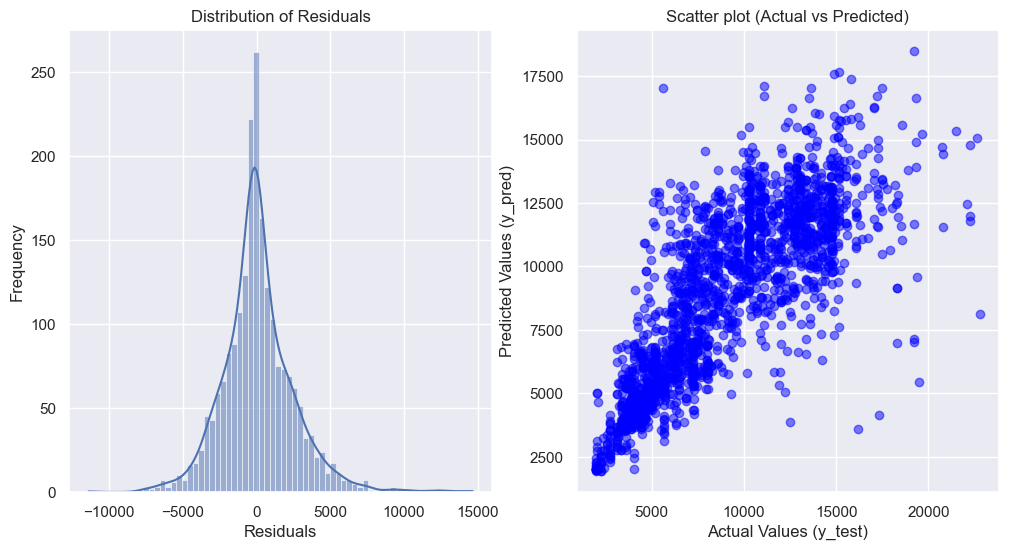

In [86]:
# Base model

from sklearn.neighbors import KNeighborsRegressor
Regressor(KNeighborsRegressor(), x_train, y_train, x_test, y_test)


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
- The residuals (errors) are concentrated around zero, forming a distribution that appears relatively normal with a slight skew.
- There are some extreme residuals, as seen in the tails extending beyond ±5000, indicating some predictions are significantly off.
- The peak at zero suggests the model generally makes accurate predictions, but the spread indicates variability in performance.
- **Scatter Plot (Actual vs Predicted):**
- There is a positive correlation, as most points are aligned along a diagonal, indicating that the model's predictions generally increase with the actual values.
- However, the points are somewhat dispersed from the diagonal, particularly at higher actual values, suggesting the model struggles to make precise predictions for higher values.

### Conclusion
- The KNN model shows moderate performance, capturing the general trend in the data but with some significant errors, particularly at higher actual values.

In [87]:
# Hyperparameter tuning

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
GridSearch(KNeighborsRegressor(), param_grid, x_train, y_train, x_test, y_test)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


KNeighborsRegressor(p=1)
Mean Absolute Error (MAE): 1529.554957507082
Mean Squared Error (MSE): 4956470.324249291
Root Mean Squared Error (RMSE): 2226.3131685028707
R-squared (R2): 0.707209952536531


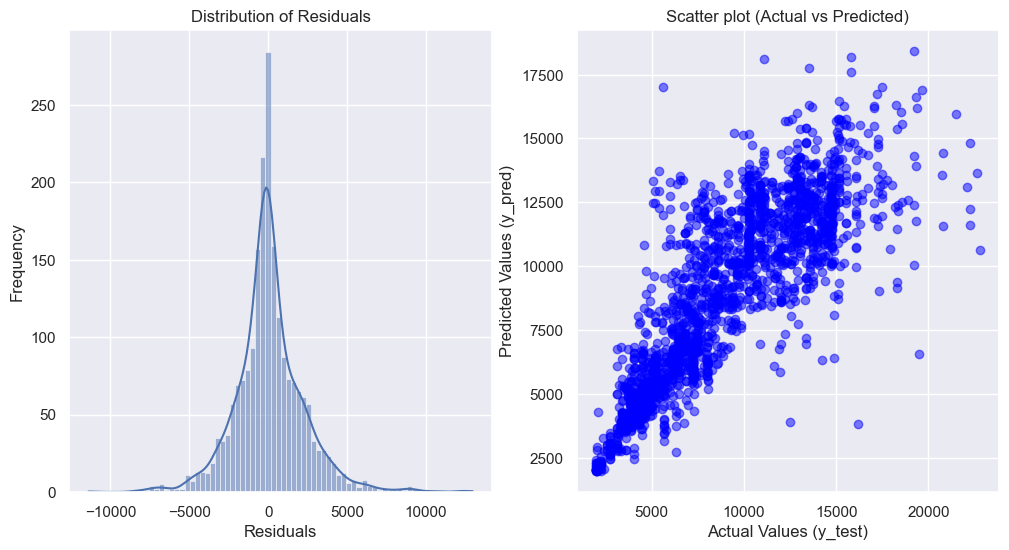

In [88]:
# Tuned model

knn = KNeighborsRegressor(n_neighbors = 5, p = 1, weights = 'uniform')
Regressor(knn, x_train, y_train, x_test, y_test)


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
- The residuals are mostly centered around zero, with a distribution that appears relatively normal, though slightly skewed.
- The peak at zero indicates that most predictions are close to the actual values, but the presence of tails extending beyond ±5000 shows that some predictions are significantly off.
- The residual distribution is tighter compared to the previous KNN model without a specified distance metric, indicating improved precision.
- **Scatter Plot (Actual vs Predicted):**
- There is a clear positive correlation, with many points close to the diagonal line, indicating that the model's predictions generally track the actual values well.
- However, there is some dispersion from the diagonal, especially at higher actual values, indicating that while the model captures the trend, it still struggles to predict higher values accurately.

### Conclusion
- The KNN model with Manhattan distance (p=1) shows improved performance over the previous KNN model with Euclidean distance (the default p=2).

## <font color = 'red'> Gradient Boosting Regressor </font>

GradientBoostingRegressor()
Mean Absolute Error (MAE): 1457.1576255051018
Mean Squared Error (MSE): 3729878.1976791937
Root Mean Squared Error (RMSE): 1931.2892578998087
R-squared (R2): 0.7796675571346521


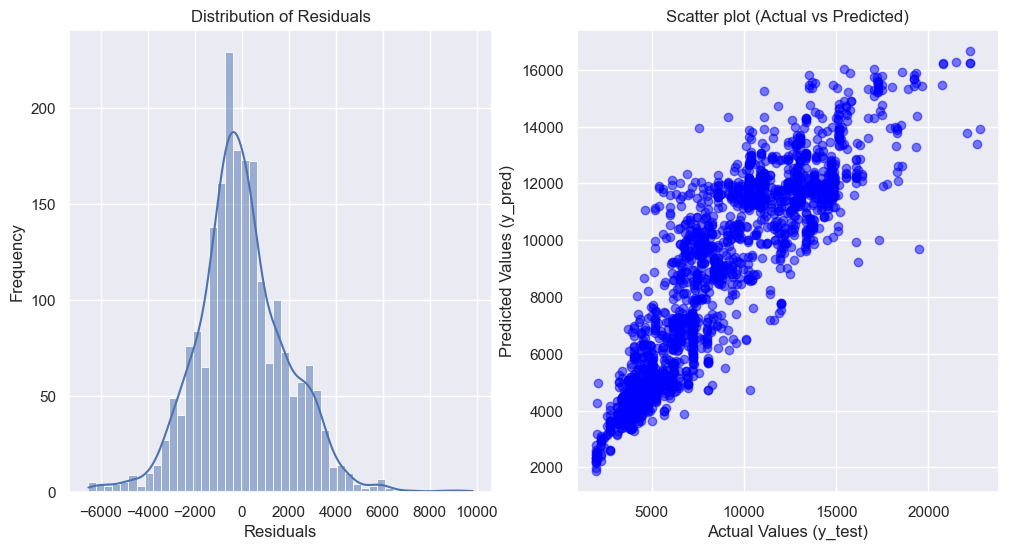

In [89]:
# Base model

from sklearn.ensemble import GradientBoostingRegressor
Regressor(GradientBoostingRegressor(), x_train, y_train, x_test, y_test)
    


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
- The residuals are centered around zero, with a distribution that appears close to normal but slightly skewed, with some residuals extending beyond ±4000.
- The peak at zero indicates that many predictions are close to the actual values, but the tails show that some predictions are significantly off.
- This distribution is relatively tight, implying that the model generally makes predictions close to the actual values.
- **Scatter Plot (Actual vs Predicted):**
- Many points are close to the diagonal line, indicating that the model's predictions closely follow the actual values.
- However, some dispersion, especially at higher values, suggests that the model could still improve in predicting extreme values.
### Conclusion
- The Gradient Boosting Regressor outperforms previous models, as evidenced by the lower MAE, MSE, and RMSE, as well as the higher R² value.

In [90]:
# Hyperparameter tuning

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
GridSearch(GradientBoostingRegressor(), param_grid, x_train, y_train, x_test, y_test)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=200)
Mean Absolute Error (MAE): 1061.6502156862264
Mean Squared Error (MSE): 2258494.451356237
Root Mean Squared Error (RMSE): 1502.8288163846994
R-squared (R2): 0.8665855630420365


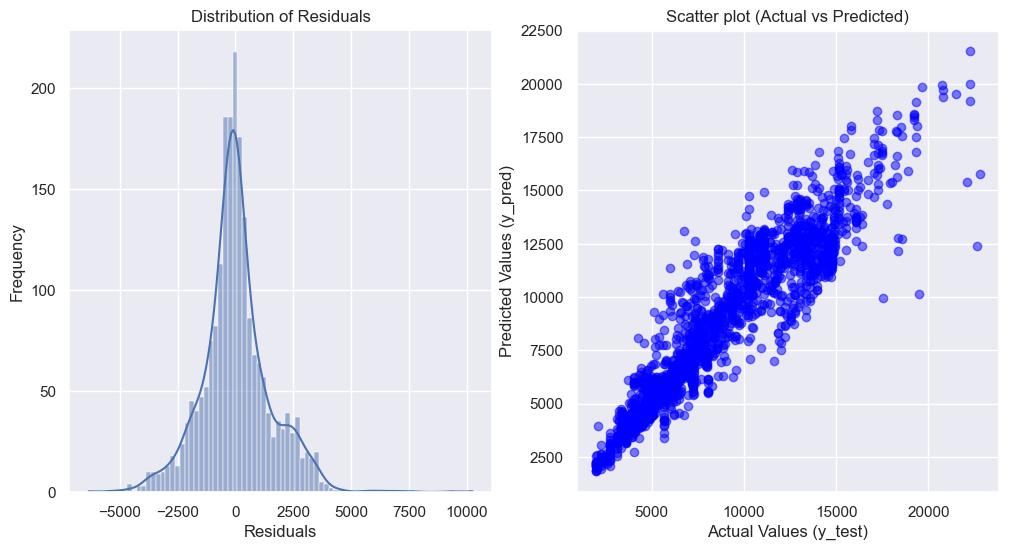

In [91]:
# Tuned model

gbr = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 5,
                                min_samples_leaf = 4, min_samples_split = 10, n_estimators = 200)
Regressor(gbr, x_train, y_train, x_test, y_test)


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
- The residuals are more tightly clustered around zero compared to the previous models, suggesting that the model is now making predictions closer to the actual values more consistently.- The peak at zero indicates that many predictions are close to the actual values, but the tails show that some predictions are significantly off.
- The distribution remains slightly skewed, but the tails are narrower, indicating fewer extreme errors.
- **Scatter Plot (Actual vs Predicted):**
- The scatter plot shows a tighter clustering of points around the diagonal line, indicating that the predictions are more accurate.
- There is still some dispersion, but it is less pronounced, especially at higher actual values, meaning the model handles a broader range of values more effectively.
### Conclusion
- The tuning of the Gradient Boosting Regressor has significantly enhanced its performance, making it more accurate and better at capturing the underlying patterns in the data.

## <font color = 'red'> Decision Tree Regressor </font>

DecisionTreeRegressor()
Mean Absolute Error (MAE): 1297.3856232294618
Mean Squared Error (MSE): 4839712.500660608
Root Mean Squared Error (RMSE): 2199.9346582706967
R-squared (R2): 0.7141071044357385


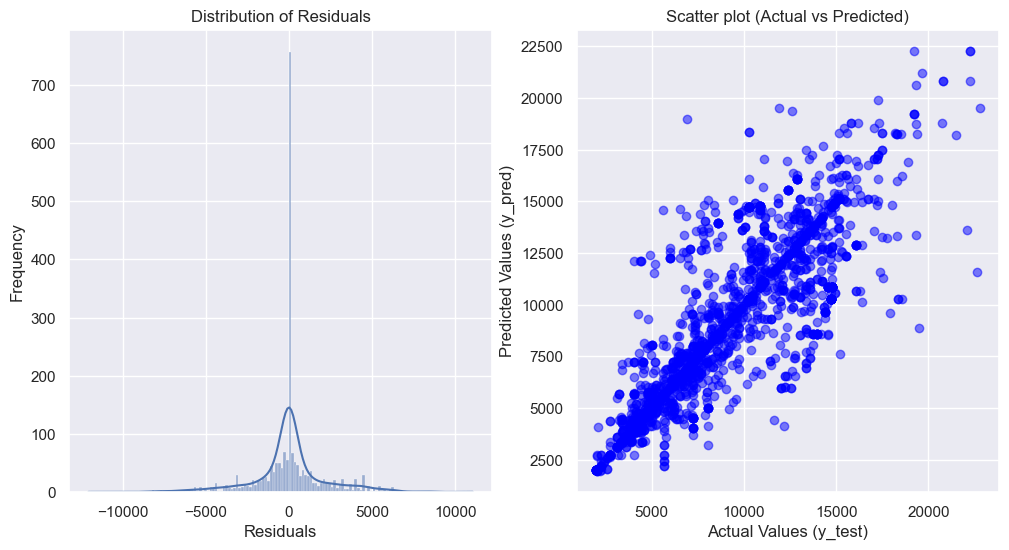

In [92]:
# Base model

from sklearn.tree import DecisionTreeRegressor
Regressor(DecisionTreeRegressor(), x_train, y_train, x_test, y_test)


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
- The residuals are sharply peaked around zero, which is common for decision trees due to their tendency to overfit.
- However, the distribution shows a spread across both positive and negative residuals, indicating that the model is making a variety of errors, including some significant ones.
- **Scatter Plot (Actual vs Predicted):**
- The scatter plot reveals a noticeable spread of predicted values around the actual values, particularly at the higher end.
- While there is a general upward trend, the spread suggests the model struggles with capturing the full variability in the data, leading to less accurate predictions at times.
### Conclusion
- The Decision Tree Regressor has delivered a somewhat reasonable performance, but it's clear that it might be overfitting, especially given the sharp peak in the residuals and the somewhat lower R² score.

In [93]:
# Hyperparameter tuning

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['mse', 'friedman_mse']
}
GridSearch(DecisionTreeRegressor(), param_grid, x_train, y_train, x_test, y_test)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=4, min_samples_split=10)
Mean Absolute Error (MAE): 1293.8608443533985
Mean Squared Error (MSE): 3476179.500539445
Root Mean Squared Error (RMSE): 1864.4515280745286
R-squared (R2): 0.7946541198935481


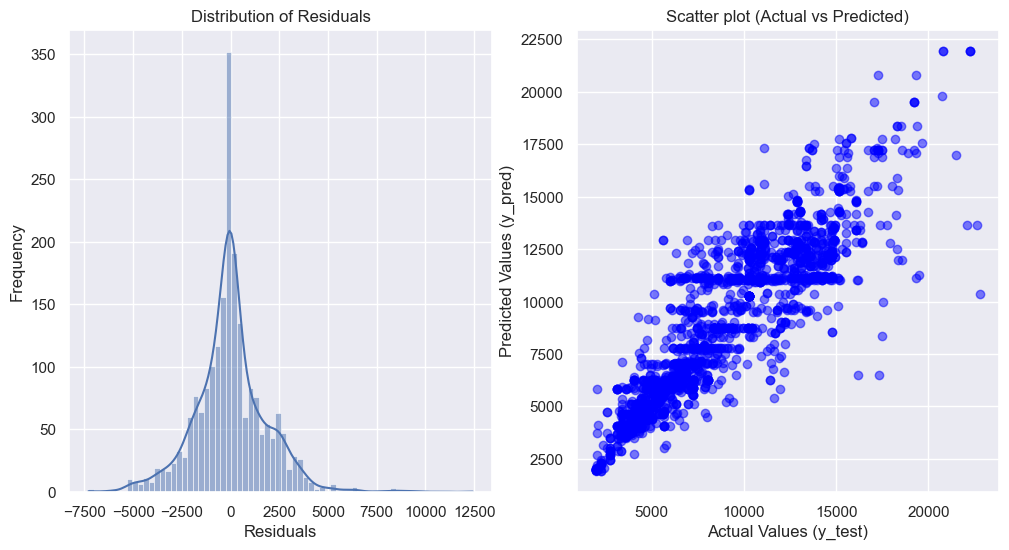

In [94]:
# Tuned model

dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, max_features = None,
                            min_samples_leaf = 4, min_samples_split = 10)
Regressor(dtr, x_train, y_train, x_test, y_test)


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
- The residuals are still sharply peaked around zero, but the distribution is somewhat more spread out compared to the untuned model, indicating slightly better generalization.
- The residuals' spread, though better, still suggests some overfitting, which is a common trait in decision trees.
- **Scatter Plot (Actual vs Predicted):**
- The scatter plot shows a tighter clustering of predicted values around the actual values, especially in the middle range, indicating better alignment between predictions and actual values.
- There is still some spread, particularly at the higher end, indicating the model may still struggle with predicting higher values accurately.
### Conclusion
- The tuning has improved the Decision Tree Regressor's performance, particularly in reducing errors (lower MAE and RMSE) and better capturing the variance in the data (higher R²).
- However, the model still shows signs of overfitting, as evidenced by the sharp peak in the residuals and the spread in the scatter plot.

## <font color = 'red'> XG Boost Regressor </font>

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error (MAE): 1063.5567365867896
Mean Squared Error (MSE): 2360966.1300762654
Root Mean Squared Error (RMSE): 1536.5435659545308
R-squared (R2): 0.8605323433876038


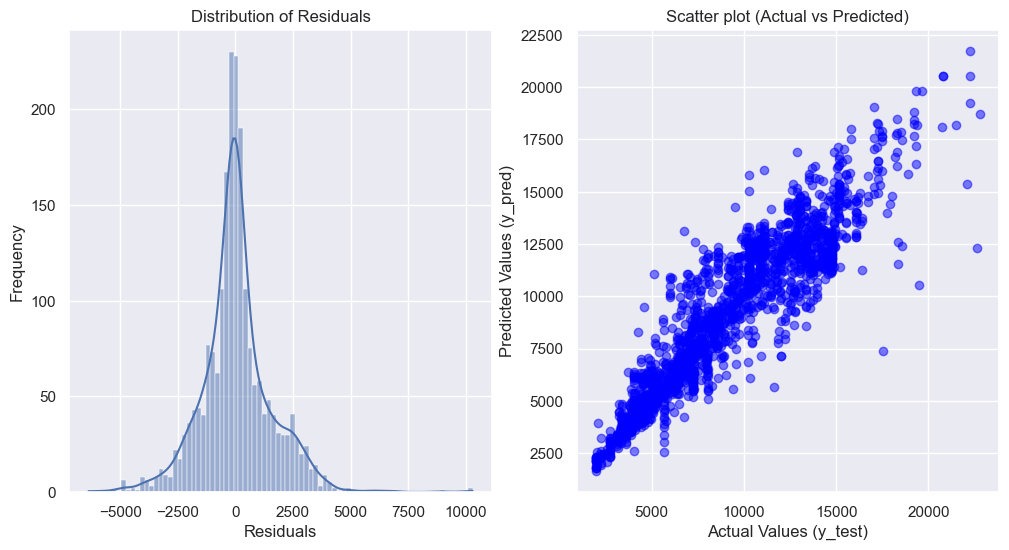

In [95]:
# Base model

import xgboost as xgb
Regressor(xgb.XGBRegressor(), x_train, y_train, x_test, y_test)


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
- The residuals are more normally distributed around zero, and the peak is less sharp compared to the Decision Tree models. This suggests a better generalization of the model.
- The spread of the residuals is more balanced, indicating that the XGBoost model is less prone to overfitting compared to the Decision Tree models.
- **Scatter Plot (Actual vs Predicted):**
- The scatter plot shows a tighter clustering of predicted values around the actual values, especially across a wide range of values, indicating strong model performance.
- There is less spread in the scatter plot compared to previous models, showing that the XGBoost model is making more accurate predictions consistently.
### Conclusion
- The distribution of residuals suggests that the XGBoost model generalizes well to the test data, reducing the likelihood of overfitting.
- The tight clustering in the scatter plot demonstrates that the XGBoost model provides reliable predictions across the full range of target values.

In [96]:
# Hyperparameter tuning

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2]
}
GridSearch(xgb.XGBRegressor(), param_grid, x_train, y_train, x_test, y_test)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.2],
         

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)
Mean Absolute Error (MAE): 1075.9673716659474
Mean Squared Error (MSE): 2252032.8694630023
Root Mean Squared Error (RMSE): 1500.6774701657257
R-squared (R2): 0.8669672608375549


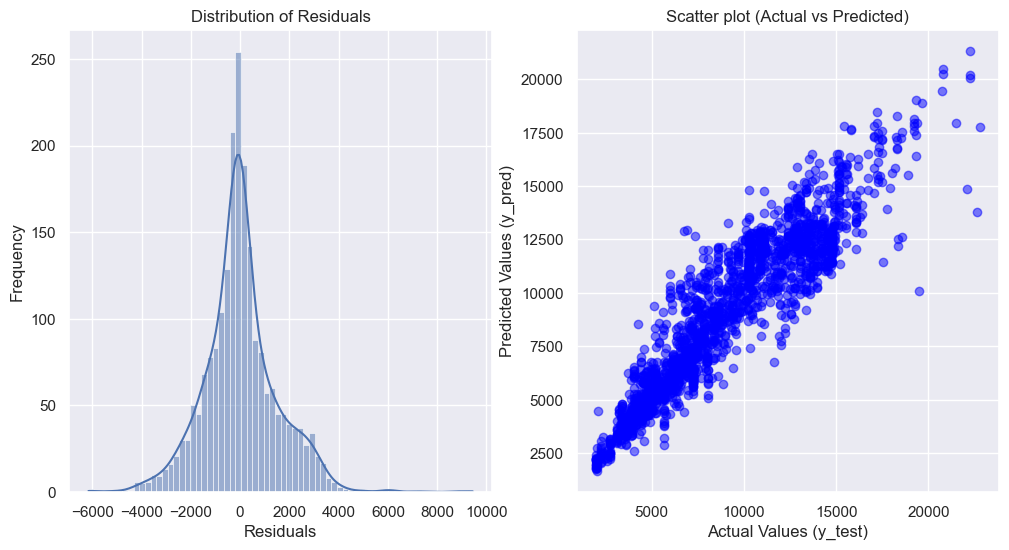

In [97]:
# Tuned model

xgb_regressor = xgb.XGBRegressor(alpha = 0.1, 
                                 colsample_bytree = 0.9, 
                                 gamma = 0, 
                                 reg_lambda = 1.5, 
                                 learning_rate = 0.2, 
                                 max_depth = 5, 
                                 min_child_weight = 1, 
                                 n_estimators = 200, 
                                 subsample = 1.0)
Regressor(xgb_regressor, x_train, y_train, x_test, y_test)


## <font color = 'red'> Observations: </font>
- **Distribution of Residuals:**
- The residuals are slightly more normally distributed around zero compared to the untuned model, indicating that the tuning process has resulted in more balanced predictions.
- The distribution is also a bit tighter, which suggests that the model is less prone to extreme errors.
- **Scatter Plot (Actual vs Predicted):**
- The scatter plot shows an even tighter clustering of predicted values around the actual values, indicating improved prediction accuracy after tuning.
- The alignment along the diagonal is more consistent, showing that the tuning has helped in achieving more reliable predictions across different target values.
### Conclusion
- The tuning of the XGBoost Regressor has led to an improvement in some key metrics, particularly in reducing the RMSE and slightly increasing the R² score.
- The distribution of residuals and the scatter plot both indicate that the tuned model provides better generalization and more accurate predictions compared to the untuned version.
- While the MAE is slightly higher, the overall reduction in RMSE and tighter residual distribution suggests that the model is more robust and better tuned to handle various scenarios within the data.

In [98]:
result()

Model           MSE       MAE      RMSE  R2 SCORE
0       RandomForestRegressor  3.016140e+06  1121.872  1736.704     0.822
1       RandomForestRegressor  2.963119e+06  1229.258  1721.371     0.825
2                         SVR  1.570703e+07  3306.511  3963.210     0.072
3         KNeighborsRegressor  5.994286e+06  1722.128  2448.323     0.646
4         KNeighborsRegressor  4.956470e+06  1529.555  2226.313     0.707
5   GradientBoostingRegressor  3.729878e+06  1457.158  1931.289     0.780
6   GradientBoostingRegressor  2.258494e+06  1061.650  1502.829     0.867
7       DecisionTreeRegressor  4.839713e+06  1297.386  2199.935     0.714
8       DecisionTreeRegressor  3.476180e+06  1293.861  1864.452     0.795
9                XGBRegressor  2.360966e+06  1063.557  1536.544     0.861
10               XGBRegressor  2.252033e+06  1075.967  1500.677     0.867

# <font color = "red"> Conclusion: </font>

## **Analysis and Observations**

### **1. Best Performing Model**
- **Tuned GradientBoostingRegressor** and **Tuned XGBRegressor** are the top performers with an R² score of **0.867** and low RMSE values. These models provide the best balance between prediction accuracy and generalization.

### **2. Runner-Up**
- **XGBRegressor (Default)** is very close to the tuned version and also performs well, with an R² score of **0.861**.

### **3. Models with Potential Overfitting**
- **DecisionTreeRegressor** and **KNeighborsRegressor** showed lower R² scores and higher RMSEs, indicating possible overfitting.

### **4. Underperforming Model**
- **SVR** was the least effective model, with an R² score of **0.072**.

### **5. Residual and Scatter Plot Analysis**
- The residual plots for **Tuned XGBRegressor** and **Tuned GradientBoostingRegressor** were well-distributed, indicating that these models are capturing the relationship without significant bias or variance.
- The scatter plots for these models showed a tight fit around the diagonal, indicating accurate predictions.

## **Final Recommendation**
- **Tuned XGBRegressor** is recommended for the best overall performance.
- **Tuned GradientBoostingRegressor** is also highly recommended, particularly for slightly more interpretability.

These models demonstrate both strong prediction accuracy and good generalization, making them ideal choices for your problem.

